<a href="https://colab.research.google.com/github/shivangishuklaa/Employee-Attrition-Problem/blob/main/EMPLOYEE_SALARY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [3]:
train_data=pd.read_csv('/content/drive/MyDrive/Cloudyml/train_dataset.csv')
train_data_salaries=pd.read_csv('/content/drive/MyDrive/Cloudyml/train_salaries.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Cloudyml/test_dataset.csv')

In [4]:
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [5]:
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [6]:
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [7]:
#Adding salary data to train_dataset
train_data=pd.merge(train_data,train_data_salaries,on='jobId')
train_data

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [8]:
# salaries less than 30 can be removed as such salary is not expected
train_data=train_data[train_data['salary']>30]

In [9]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [12]:
train_data.describe()

yearsExperience  milesFromMetropolis         salary
count    997548.000000        997548.000000  997548.000000
mean         12.015214            49.458372     116.280462
std           7.204992            28.863518      38.512936
min           0.000000             0.000000      31.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [13]:
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

In [14]:
print('train data length:',len(train_data))
print('test data length:',len(test_data))

train data length: 997548
test data length: 1000000


In [15]:
#get how many unique values are in train_dataset
for x in train_data.columns:
  print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [16]:
test_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [17]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [18]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [19]:
#drop job id and company id from train dataset
train_data=train_data.drop(['jobId','companyId'],axis=1)
train_data

jobType       degree      major   industry  yearsExperience  \
0                  CFO      MASTERS       MATH     HEALTH               10   
1                  CEO  HIGH_SCHOOL       NONE        WEB                3   
2       VICE_PRESIDENT     DOCTORAL    PHYSICS     HEALTH               10   
3              MANAGER     DOCTORAL  CHEMISTRY       AUTO                8   
4       VICE_PRESIDENT    BACHELORS    PHYSICS    FINANCE                8   
...                ...          ...        ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS  CHEMISTRY     HEALTH               19   
999996             CTO  HIGH_SCHOOL       NONE    FINANCE               12   
999997          JUNIOR  HIGH_SCHOOL       NONE  EDUCATION               16   
999998             CFO      MASTERS       NONE     HEALTH                6   
999999          JUNIOR    BACHELORS       NONE  EDUCATION               20   

        milesFromMetropolis  salary  
0                        83     130  
1                        73     101  
2                        38     137  
3                        17     142  
4                        16     163  
...                     ...     ...  
999995                   94      88  
999996                   35     160  
999997                   81      64  
999998                    5     149  
999999                   11      88  

[997548 rows x 7 columns]

In [20]:
#drop job id and company id from test dataset
test_data=test_data.drop(['jobId','companyId'],axis=1)
test_data

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [21]:
# creating two empty list to store categorical column names and numerical column names res
categorical_list = []
var_list = []
# looping on whole dataset for geting list of categorical data column name
for x in train_data.columns:
  if train_data[x].dtype =='object':
    categorical_list.append(x)
  elif train_data[x].dtype =='int64':
     var_list.append(x)
  elif train_data[x].dtype =='float64':
     var_list.append(x)


In [22]:
# Correlation metrix using pandas
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


From above correlation matrix:
1. yearsExperience and salary are positively correlated.
2. yearsExperience and milesFromMetropolis have no correlation.
3. milesFromMetropolis and salary are weakly negatively correlated.


[Text(0.5, 0, 'yearsExperience'),
 Text(1.5, 0, 'milesFromMetropolis'),
 Text(2.5, 0, 'salary')]

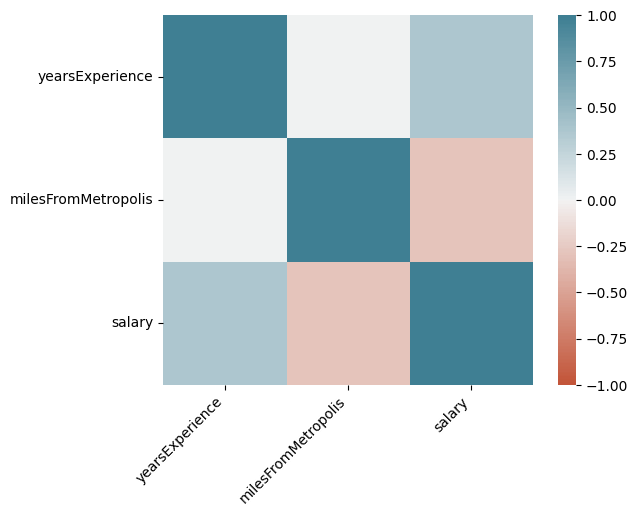

In [23]:
# Correlation metrix using seaborn
ax =sns.heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
    )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Chi-square Test



In [24]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def perform_chi_square_test(var_1,var_2):

 #Contingency Table
 contingency_table =pd.crosstab(train_data[var_1],train_data[var_2])

 #Observed Values
 observed_values = contingency_table.values

 #Expected Values
 b = chi2_contingency(contingency_table)
 expected_values = b[3]

 #Degree of Freedom
 no_of_rows =len( contingency_table.iloc[0:,0])
 no_of_columns =len(contingency_table.iloc[0:,0])
 degree_f=(no_of_rows-1)*(no_of_columns-1)
 print("Degree of Freedom: ",degree_f)

 #Significance Level 5%
 alpha =0.05
 print('Significance level: ',alpha)

 #chi-square statistic
 chi_square =sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
 chi_square_statistic =chi_square[0]+chi_square[1]
 print("chi-square statistic: ",chi_square_statistic)

 #critical_value
 critical_value=chi2.ppf(q=1-alpha,df=degree_f)
 print('critical_value:',critical_value)

 #p-value
 p_value = 1-chi2.cdf(x=chi_square_statistic,df=degree_f)
 print('p-value:',p_value)

 if chi_square_statistic>=critical_value:
  print("Reject H0,There is a relationship between 2 categorical variables")
 else:
  print("Retain H0,There is no relationship between 2 categorical variables")
 if p_value<=alpha:
  print("Reject H0,There is a relationship between 2 categorical variables")
 else:
  print("Retain H0,There is no relationship between 2 categorical variables")

In [25]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical_list:
 for i in categorical_list:
  if i != x:
    print('chi-square test on: ',x,' ',i,'\n')
    perform_chi_square_test(x,i)
    print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 66.3386488629688
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  49
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 66.3386488629688
p-value: 2.1749146183136503e-05
Reject H0,There is a relationship between 2 cate

From above chi-square test:
correlated variables:
1. jobtype and degree
2. jobtype and major
3. degree and major


SCATTER PLOT

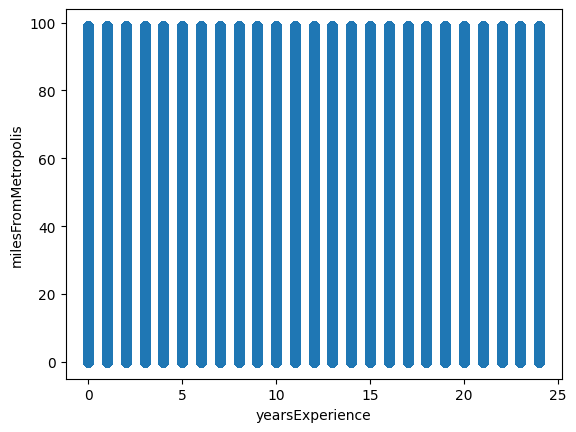

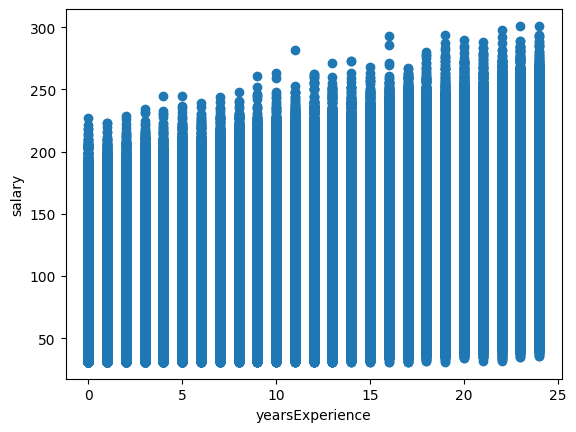

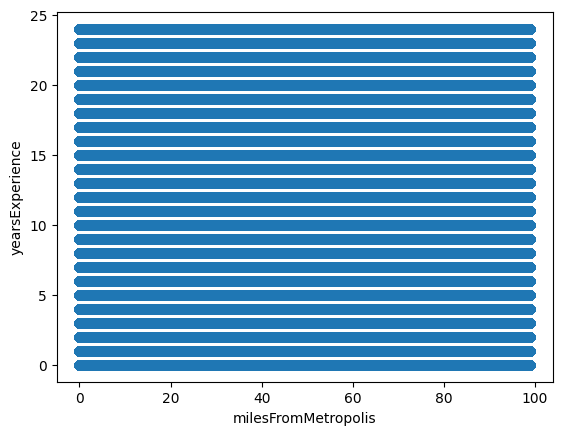

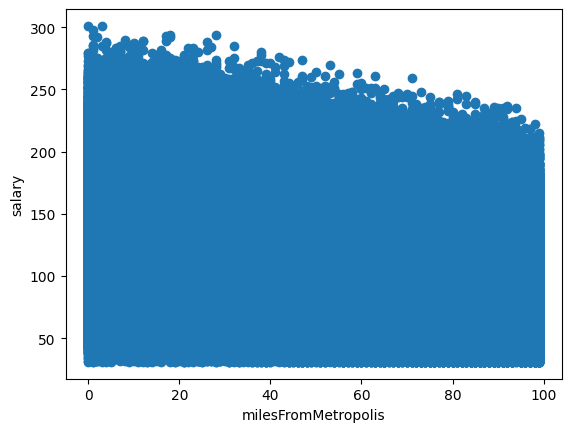

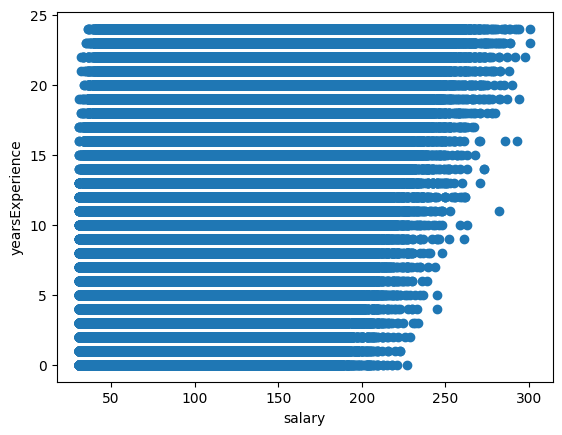

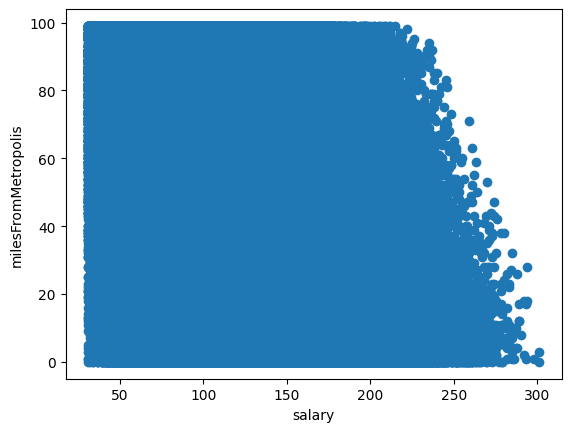

In [26]:
# Scatter plot using matplotlib
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()



# Loop through the different columns
for i in var_list:
 for j in var_list:
    if i != j:
     plot_scatter(i, j)

From above scatter plot
1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are
positively correlated.
2. Increase in value on milesFromMetropolis axis results in decrease of values on salary axis. That is they are
negatively correlated.
3. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no
correlation between these variables.


array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

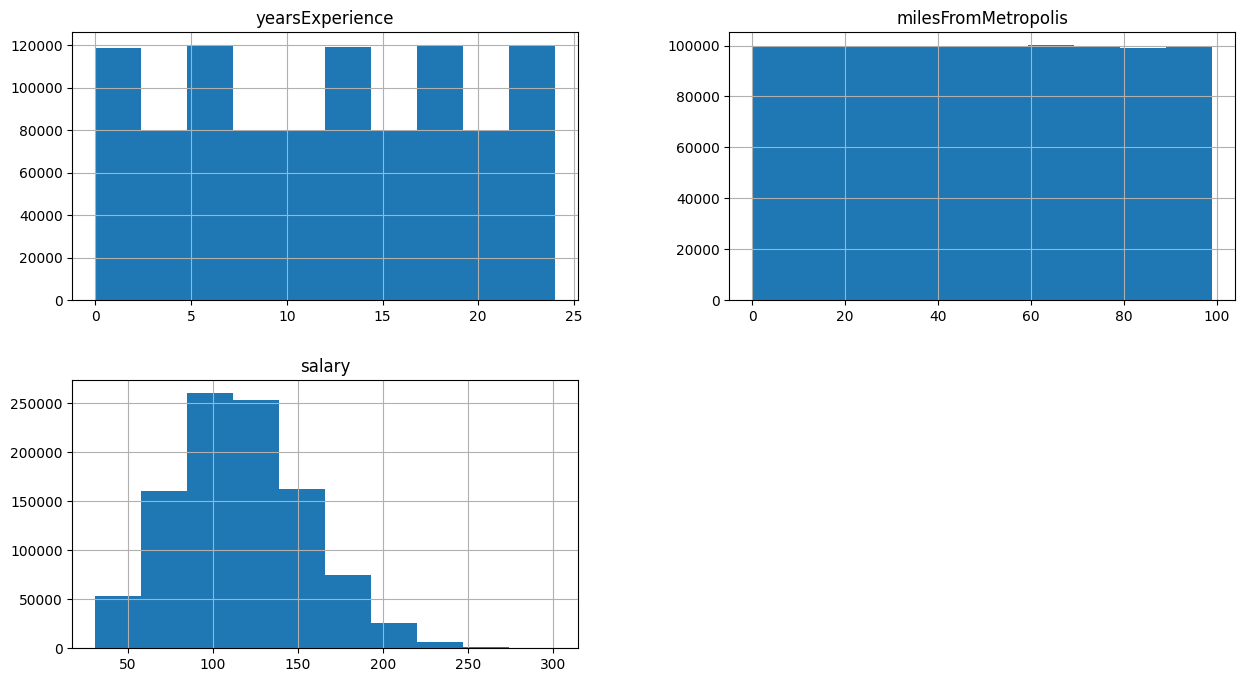

In [27]:
 # Histogram
 train_data.hist(figsize=(15,8))

From the above histogram
1. yearsExperience data distribution is symmetric.
2. milesFromMetropolis data distribution is symmetric.
3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)

<Axes: >

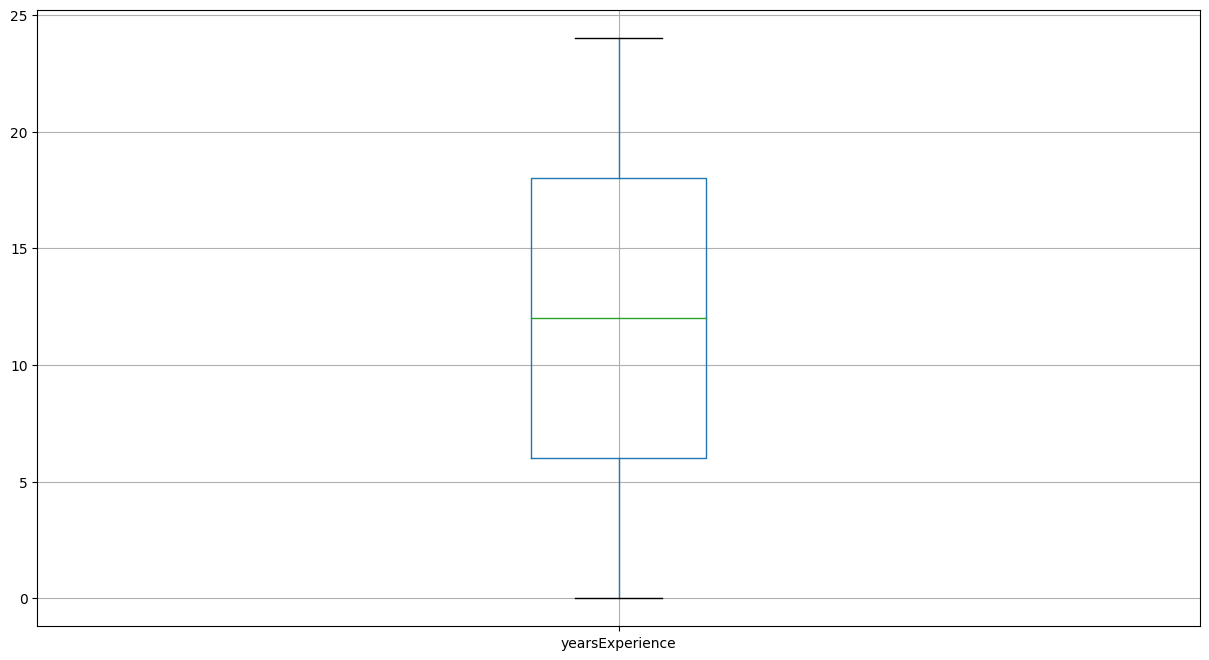

In [28]:
# box plot for yearsExperience column,
train_data.boxplot(column='yearsExperience',figsize=(15,8))

from above box plot graph:
yearsExperience
1. 25% of employees from dataset has yearExperience of between range 0 to 6.
2. 25% of employee has yearExperience between range 6 to 12.
3. 25% of employee has yearExperience between range 12 to 18.
4. 25% of employee has yearExperience between range 18 to 24


<Axes: >

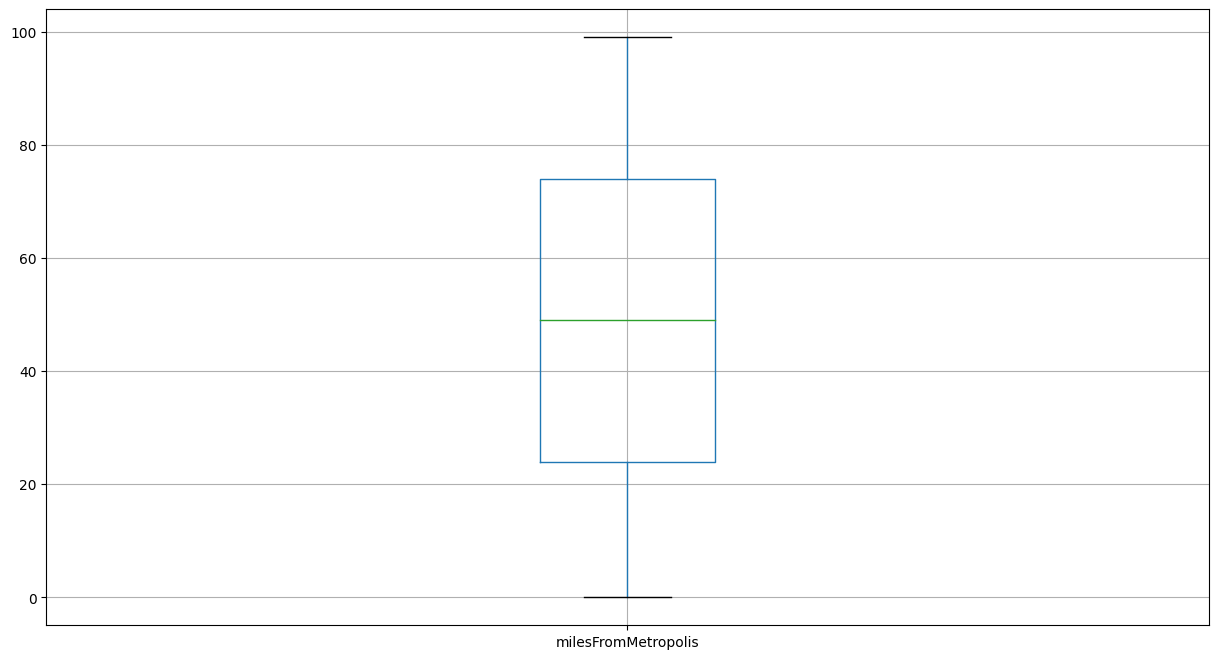

In [29]:
train_data.boxplot(column='milesFromMetropolis',figsize=(15,8))

from above box plot graph:
yearsExperience
1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
4. 25% of employee has value of milesFromMetropolis between range 76 to 100

<Axes: >

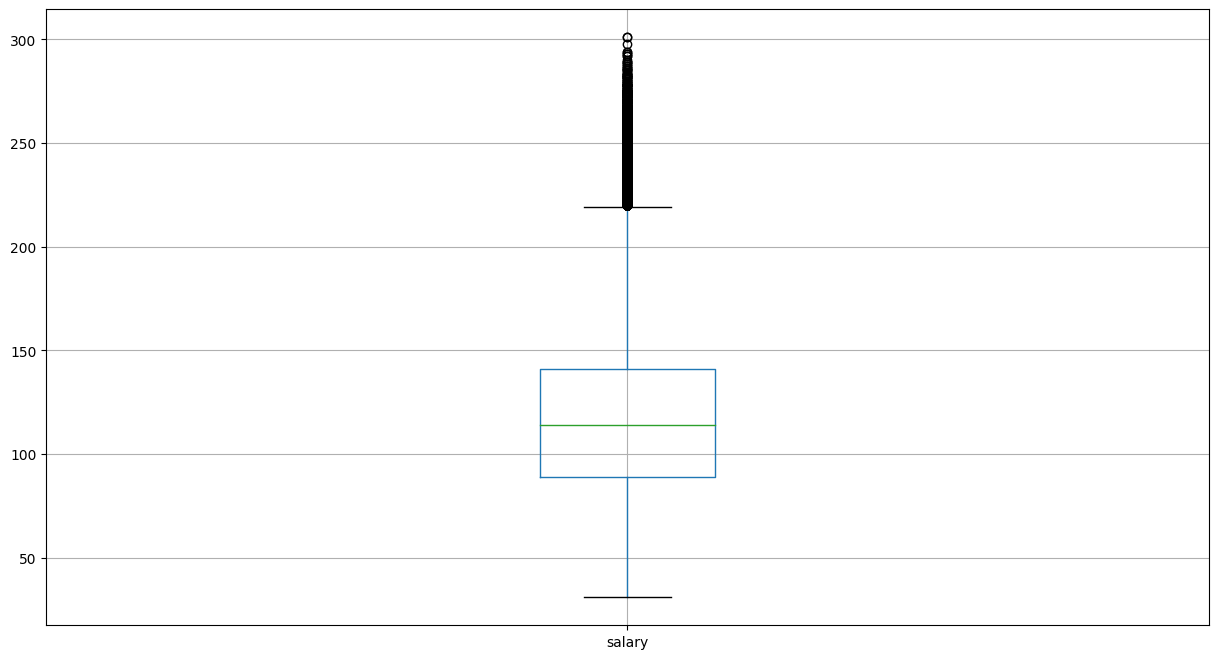

In [30]:
train_data.boxplot(column='salary',figsize=(15,8))

from above box plot graph:
yearsExperience
1. 25% of employees from dataset has value of salary between range 0 to 88.
2. 25% of employee has value of salary between range 88 to 120.
3. 25% of employee has value of salary between range 120 to 150.
4. 25% of employee has value of salary between range 150 to 300
The mean salary is around 120


<Axes: xlabel='yearsExperience', ylabel='salary'>

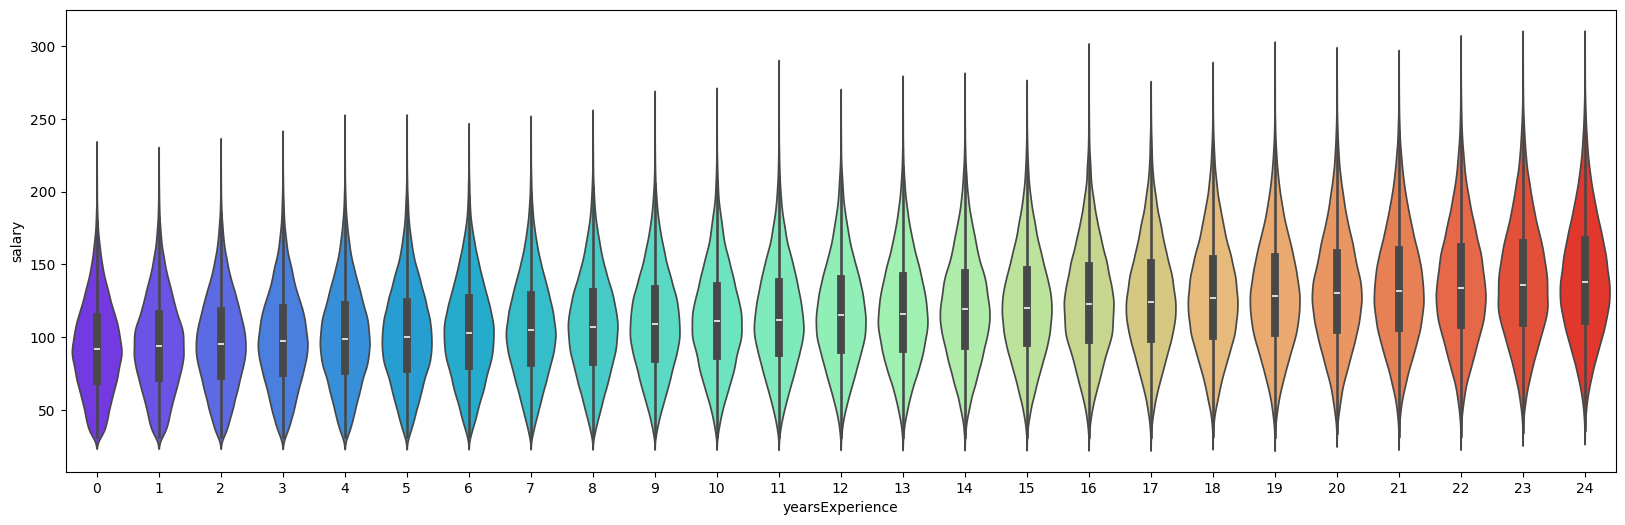

In [31]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median
has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

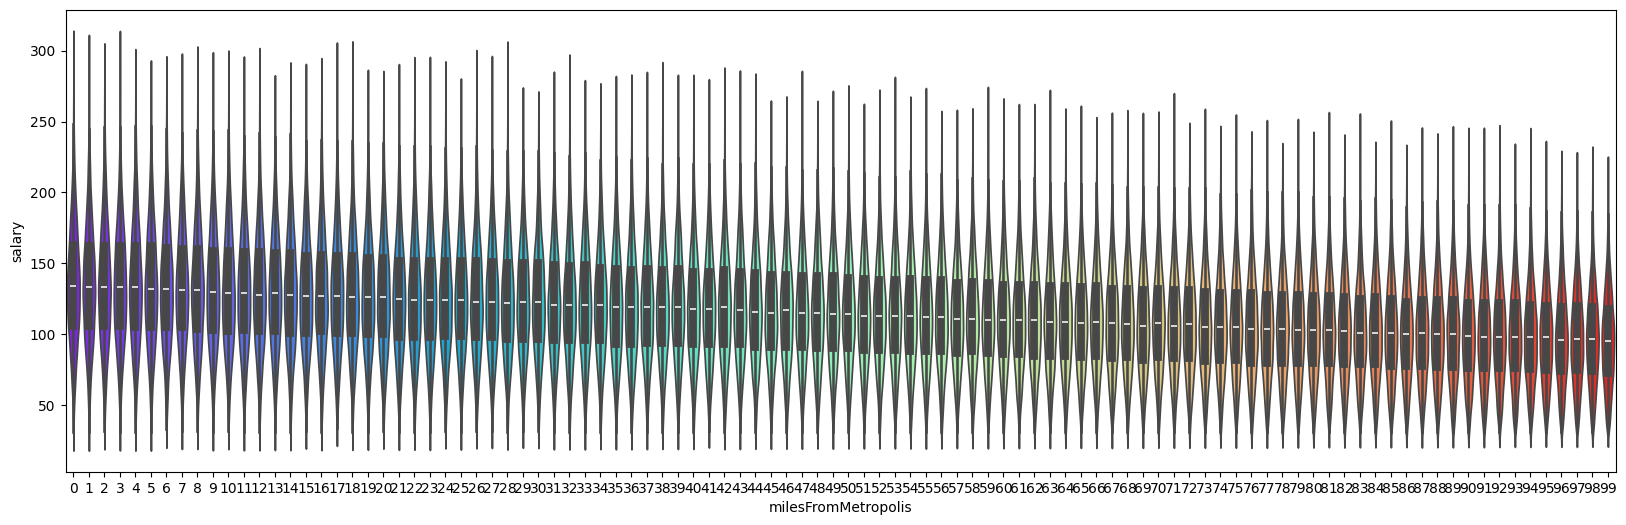

In [32]:
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

<Axes: xlabel='yearsExperience', ylabel='salary'>

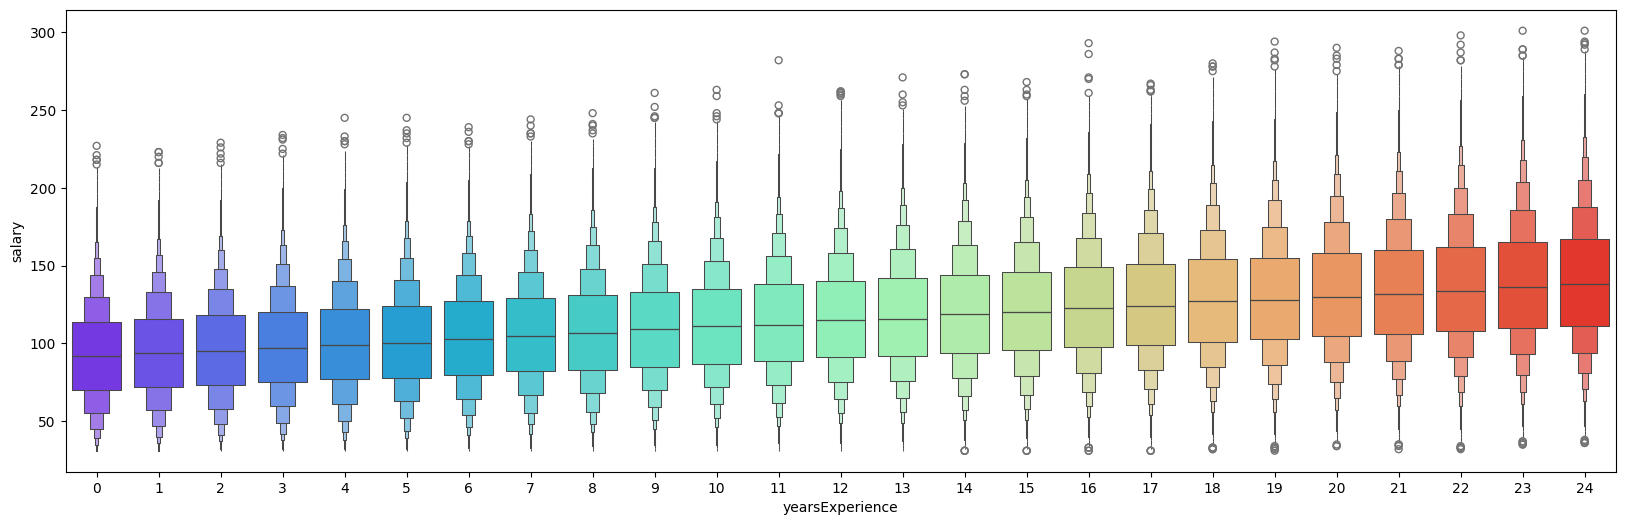

In [33]:
plt.figure(figsize=(20,6))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

<Axes: xlabel='yearsExperience', ylabel='count'>

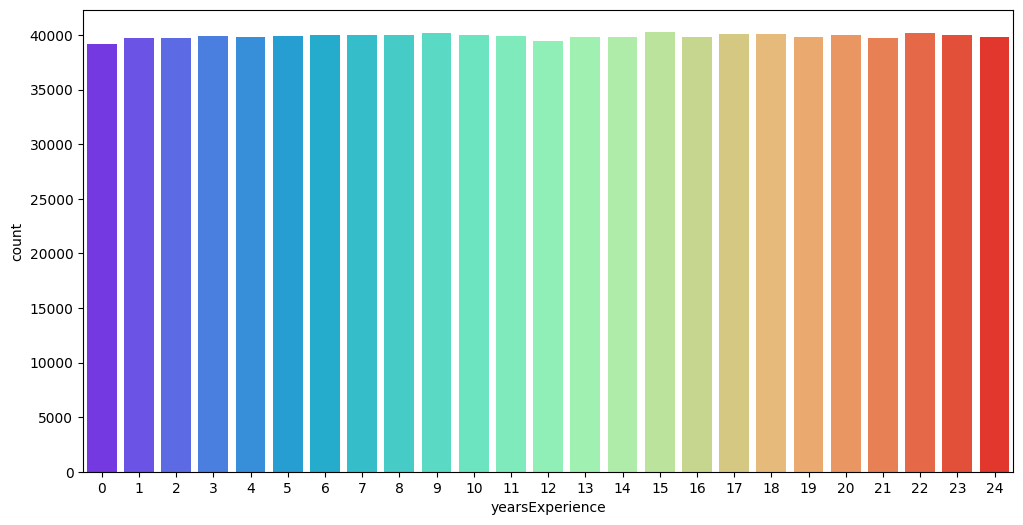

In [34]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(12,6))
sns.countplot(x='yearsExperience',data=train_data,palette='rainbow')


From above count plot
distribution of values of yearExperience is equal over complete dataset, symmetrical.


<Axes: xlabel='milesFromMetropolis', ylabel='count'>

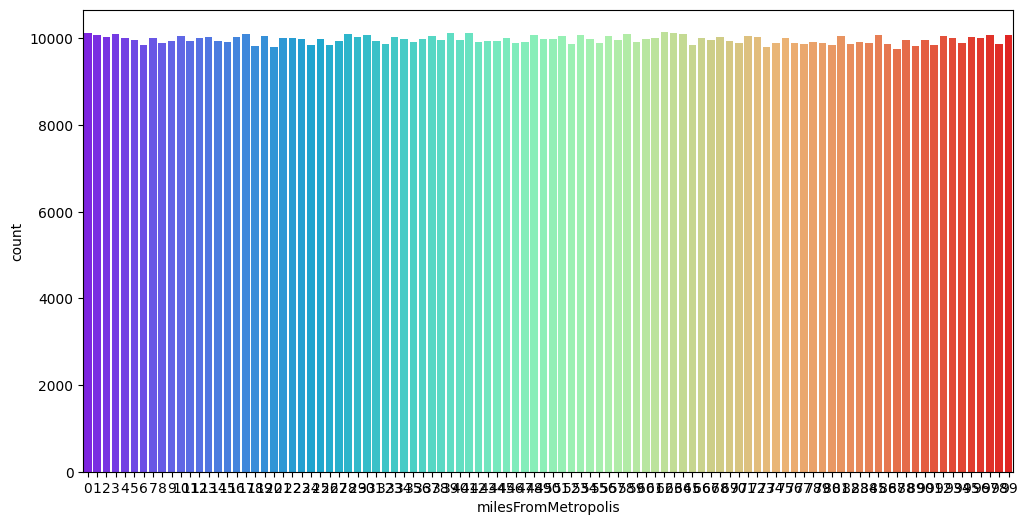

In [35]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(12,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='rainbow')

From above count plot
distribution of values of yearExperience is equal over complete dataset, symmetrical.


<Axes: xlabel='yearsExperience', ylabel='salary'>

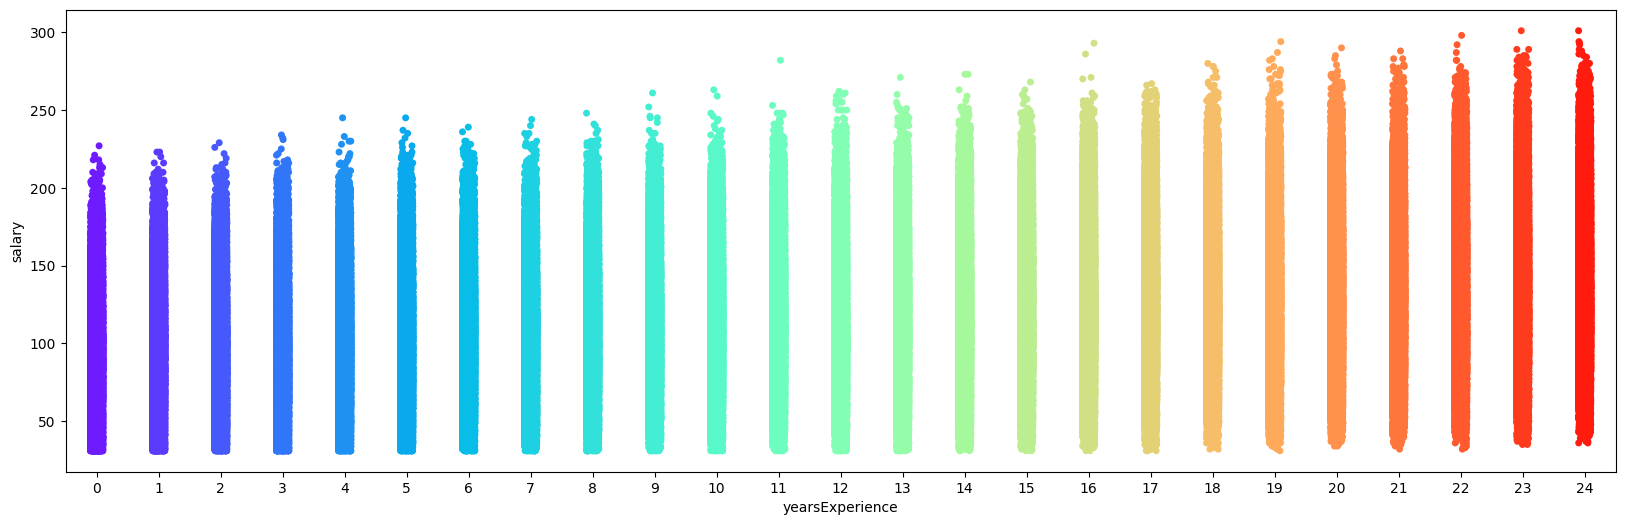

In [36]:
#strip plot between yearsExperience and salary column
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')

from above strip plot:
Distribution of values of Salary increases for increase in values of yearsExperience

<Axes: xlabel='milesFromMetropolis', ylabel='salary'>

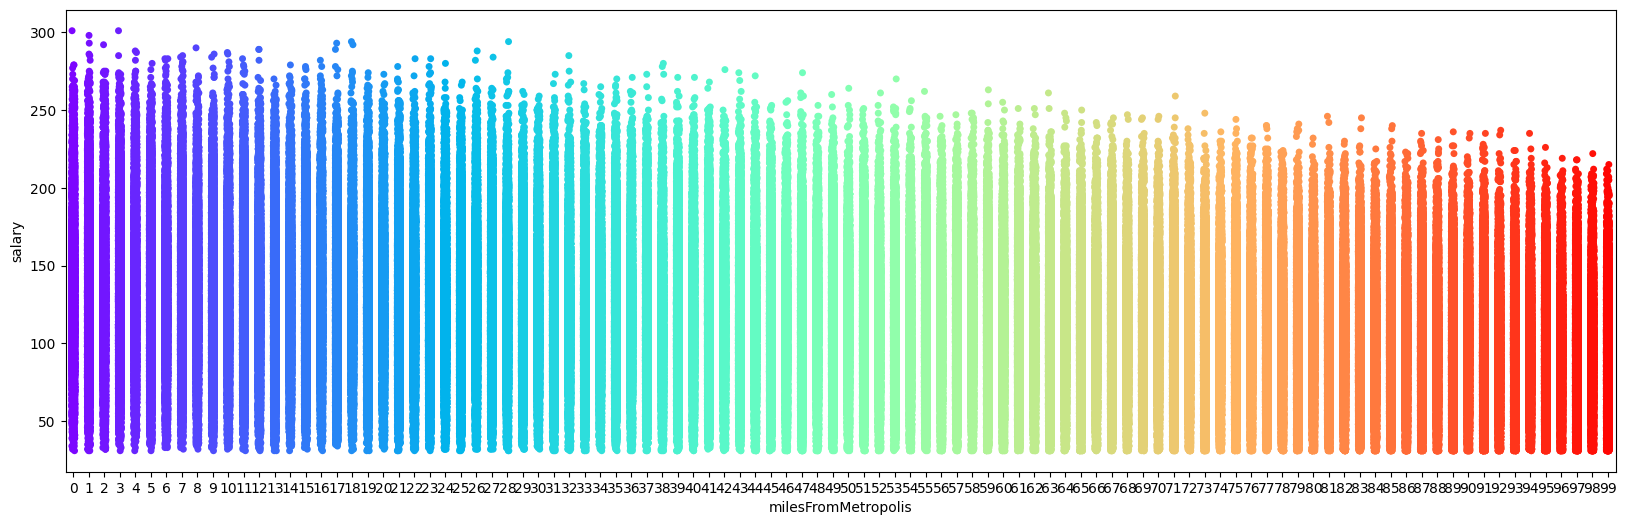

In [37]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')

from above strip plot:
Distribution of values of Salary decreases for increase in values of milesFromMetropolis

**Variance inflation factor (VIF)**


1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other
predictors in a model.
2. It is used for diagnosing collinearity/multicollinearity.
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a
model.




In [38]:
# import statsmodle library for vif
import statsmodels.api as sm


In [39]:
# creating a dataframe of just numerical values
train_for_vif = train_data.drop(['jobType','degree','major','industry','salary']
                                ,axis=1)
# target values
target =train_data['salary']
# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names


['yearsExperience', 'milesFromMetropolis']

In [40]:
 # Calculating VIF for each feature.
for i in range(0, len(names)):
 # taking one column as target variable
    y = train_for_vif.loc[:,train_for_vif.columns ==names[i]]
 # taking all other remaining columns as fetaure variable
    x =train_for_vif.loc[:,train_for_vif.columns !=names[i]]
 # firting the OLS model on y and x
    model =sm.OLS(y,x)
    results =model.fit()
 # geting the r^2 value of results.
    rsq =results.rsquared
 # calculating vif value
    vif = round(1/(1-rsq),2)
    print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq,2))))
    print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))


R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5
1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.


ANOVA Test

In [41]:
# perform anova test between two variables.
def perform_anova_test(x,y):
 # two variables of interest
 train_anova =train_data[[x,y]]
 groups =train_anova.groupby(x).count().reset_index()
 # groups.plot(kind='bar',x='major',y='salary')
 print(groups)


 unique_majors =train_anova[x].unique()
 for major in unique_majors:
    stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
    plt.title("Probability Plot - " + str(major))
    plt.show()

 # calculate ratio of the largest to the smallest sample standard deviation
 ratio =train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
 print(ratio)

 # Create ANOVA backbone table
 data = [['Between Groups', '', '', '', '', '', ''],['Within Groups', '', '', '', '', '',''],['Total','','','','','','']]
 anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F','P-value','F crit'])
 anova_table.set_index('Source of Variation', inplace = True)

 # calculate SSTR and update anova table
 x_bar = train_anova[y].mean()
 SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
 anova_table['SS']['Between Groups'] = SSTR[y].sum()

 # calculate SSE and update anova table
 SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
 anova_table['SS']['Within Groups'] = SSE[y].sum()

 # calculate SSTR and update anova table
 SSTR = SSTR[y].sum() + SSE[y].sum()
 anova_table['SS']['Total'] = SSTR

 # update degree of freedom
 anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
 anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
 anova_table['df']['Total'] = train_anova.shape[0] - 1

 # calculate MS
 anova_table['MS'] = anova_table['SS'] / anova_table['df']

 # calculate F
 F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
 anova_table['F']['Between Groups'] = F
 # p-value
 anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])

 # F critical
 alpha = 0.05
 # possible types "right-tailed, left-tailed, two-tailed"
 tail_hypothesis_type = "two-tailed"
 if tail_hypothesis_type == "two-tailed":
   alpha /= 2
 anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
 # Final ANOVA Table
 print(anova_table)

 # The p-value approach
 print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
 conclusion = "Failed to reject the null hypothesis."
 if anova_table['P-value']['Between Groups'] <= alpha:
  conclusion = "Null Hypothesis is rejected."
 print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])
 print(conclusion)

 # The critical value approach
 print("\n-----------------------------------------------------------------------------------")
 print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
 conclusion = "Failed to reject the null hypothesis."
 if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
  conclusion = "Null Hypothesis is rejected."
 print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
 print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


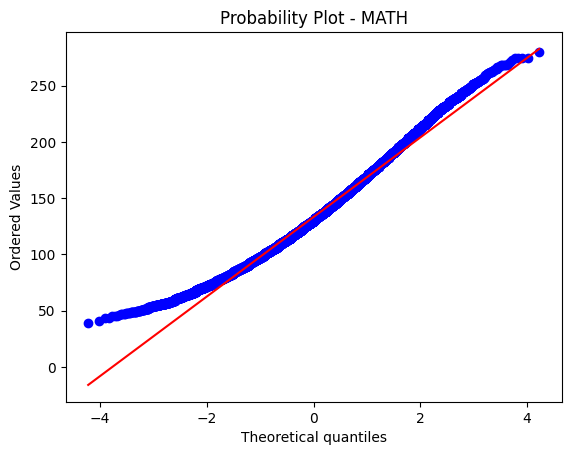

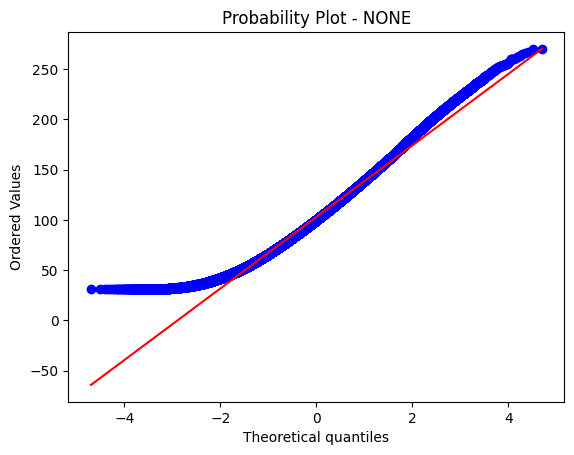

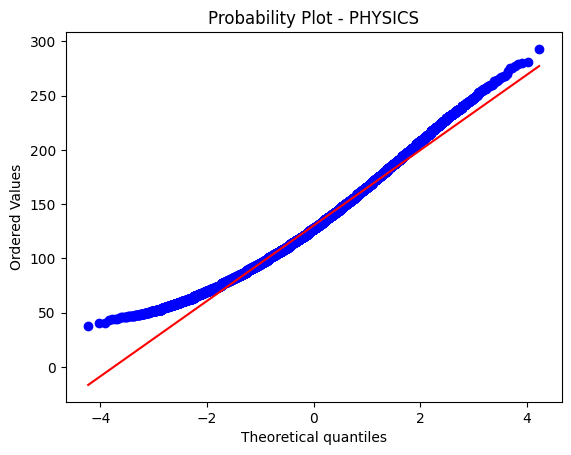

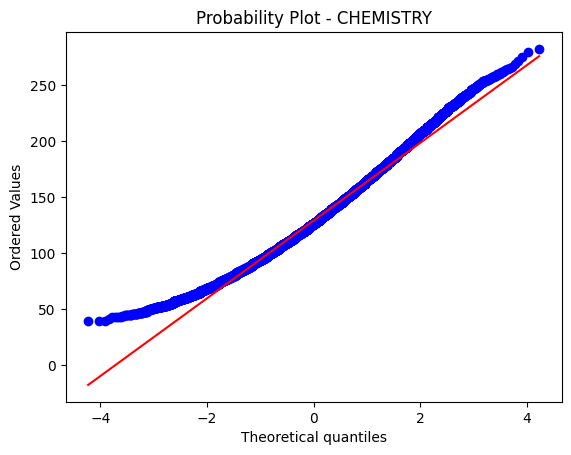

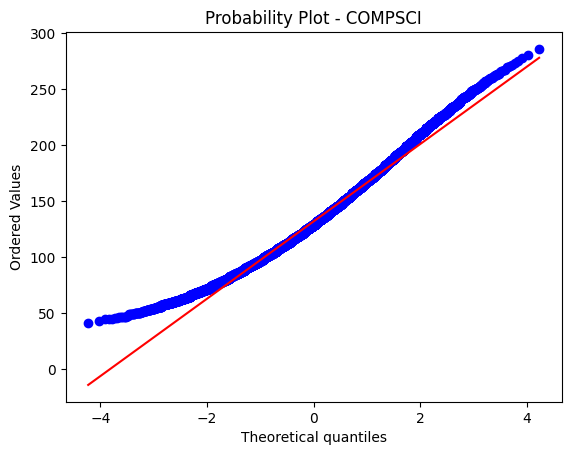

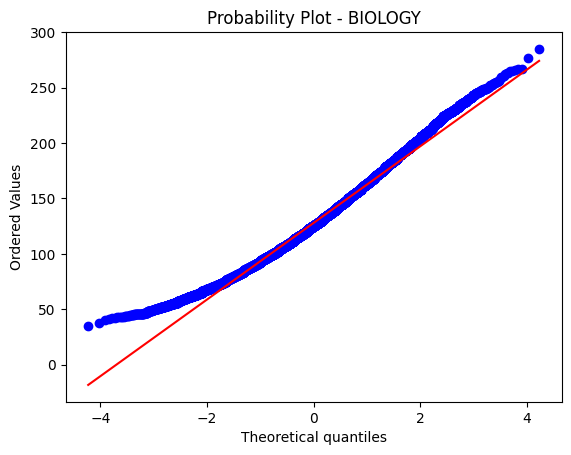

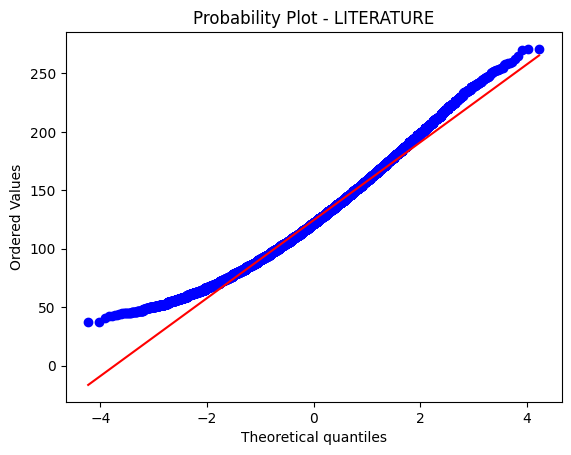

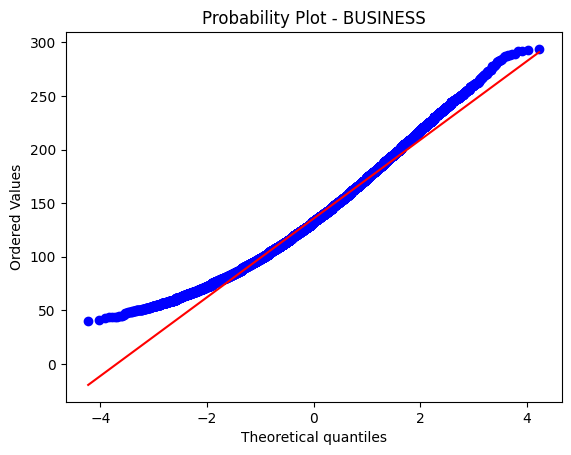

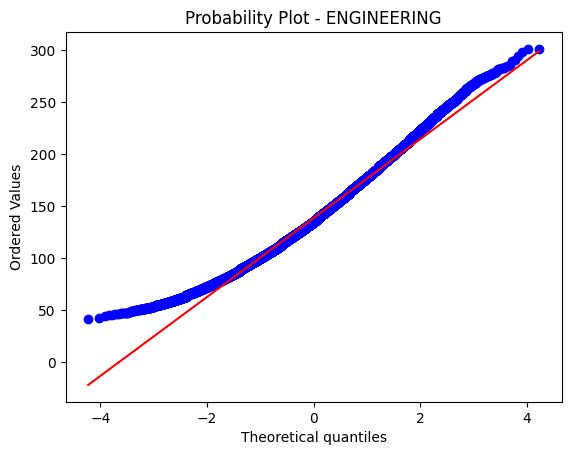

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.191831  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 2057

In [42]:
# perform anova test on major and salary
perform_anova_test('major','salary')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612


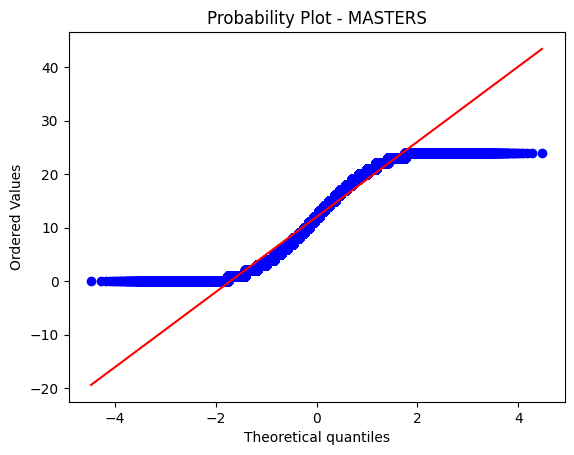

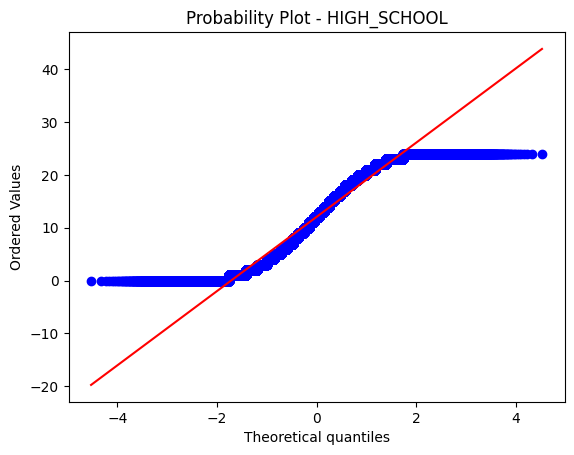

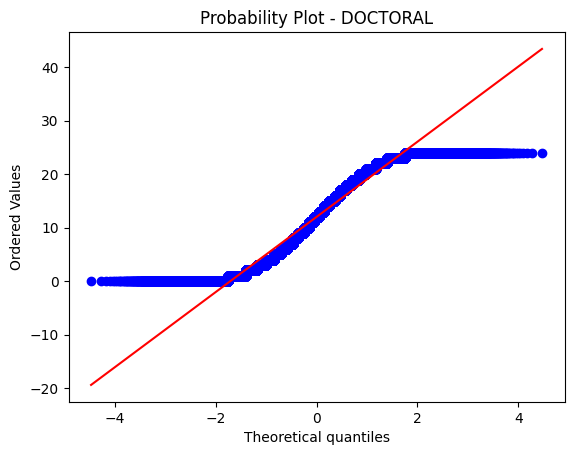

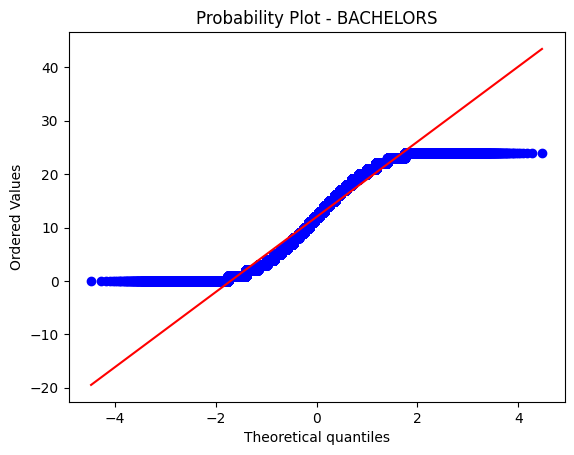

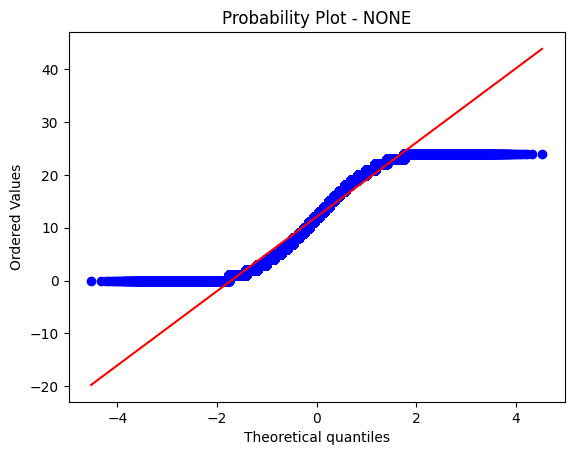

yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.785834  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and critical value is: 2.78

In [43]:
# perform anova test on major and salary
perform_anova_test('degree','yearsExperience')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


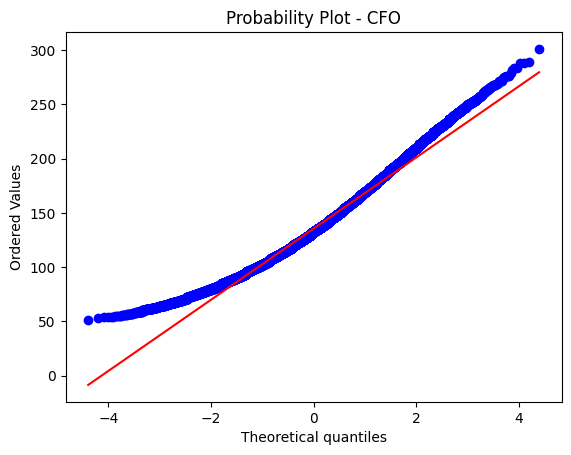

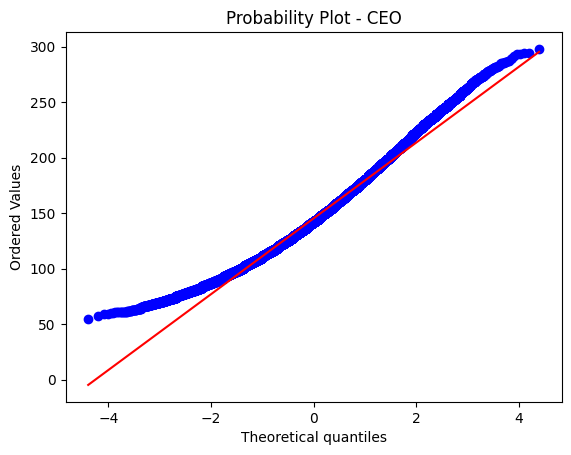

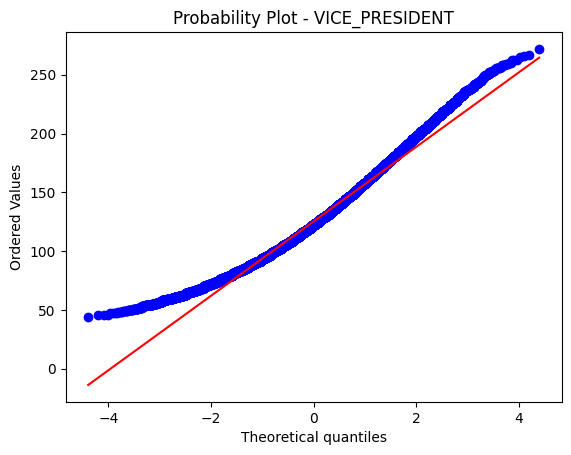

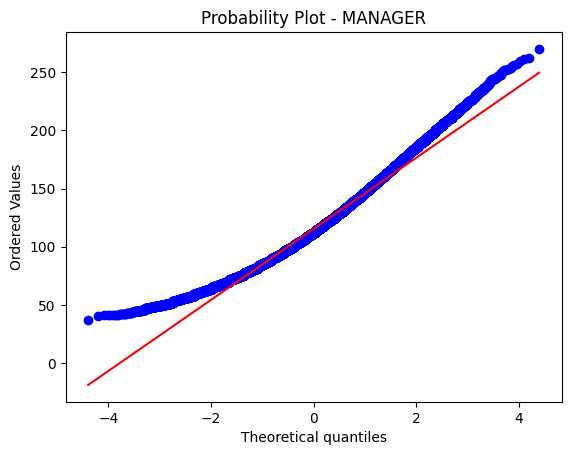

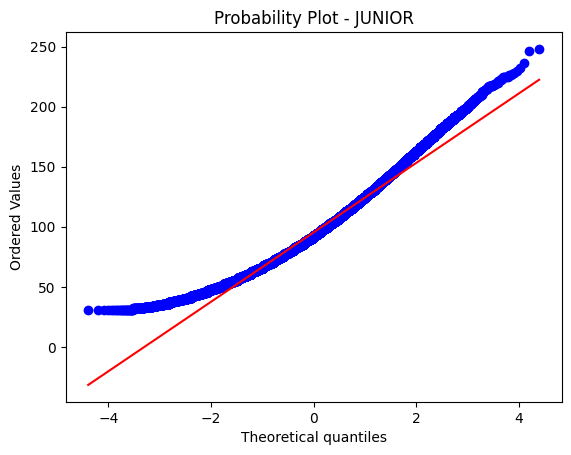

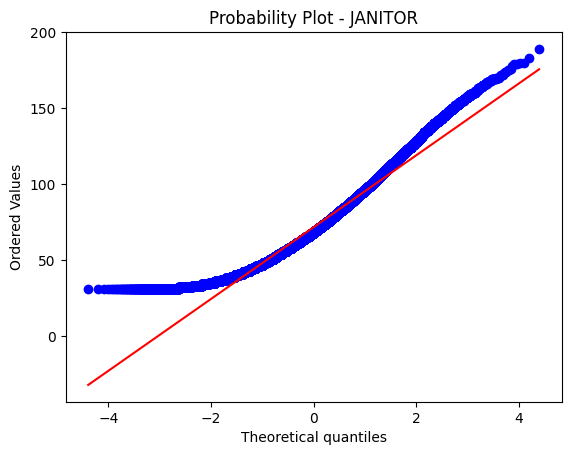

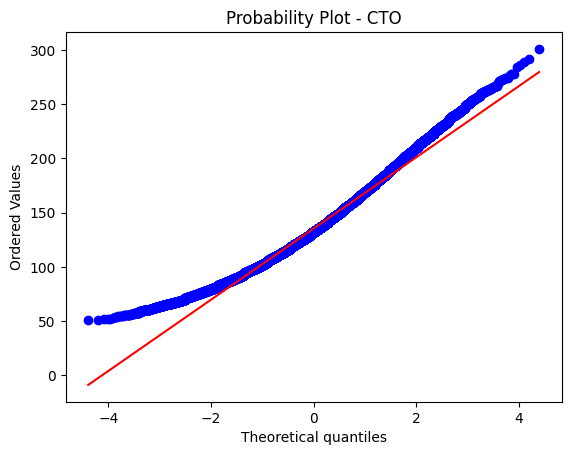

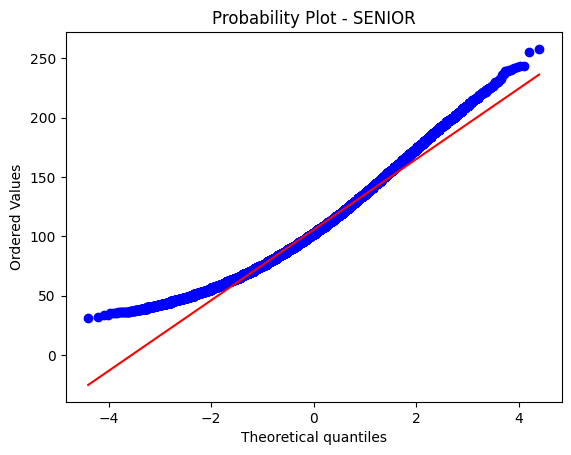

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77349.9618

In [44]:
# perform anova test on jobType and salary
perform_anova_test('jobType','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


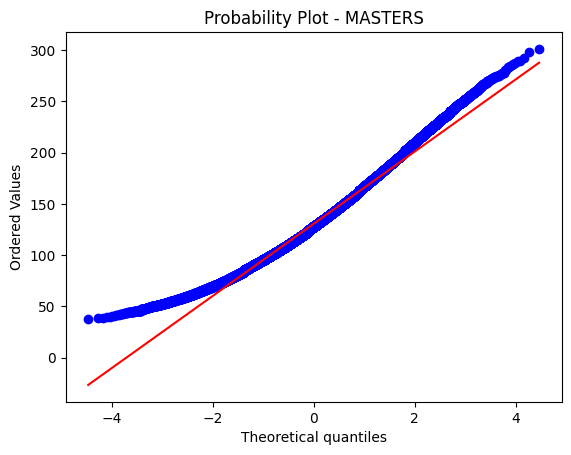

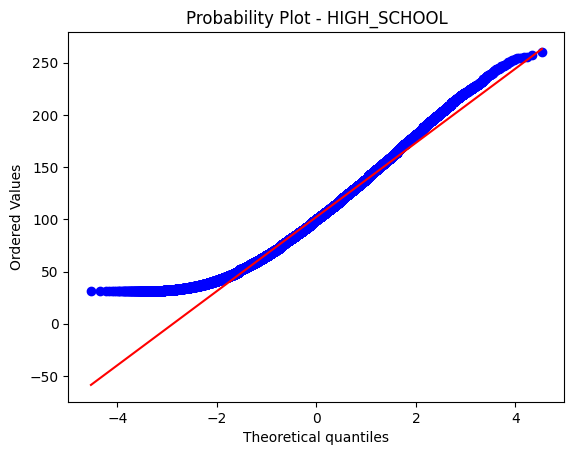

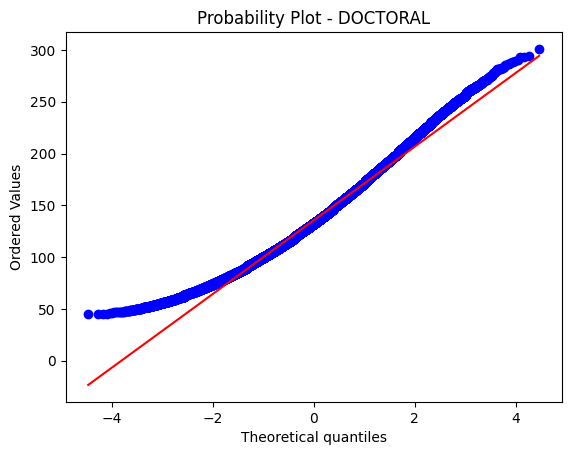

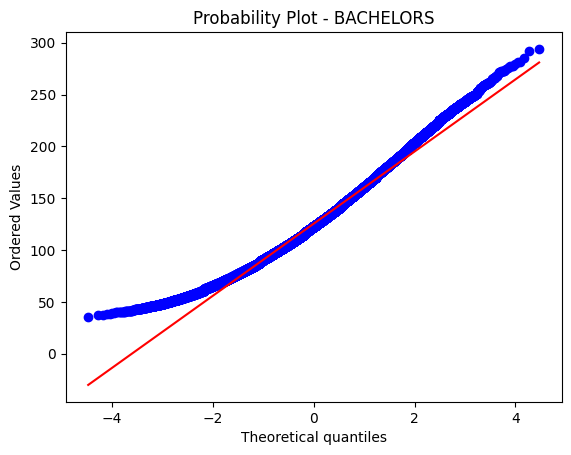

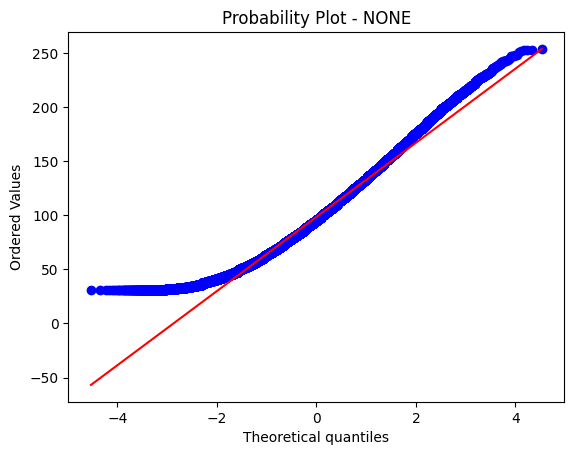

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 47107

In [45]:
# perform anova test on degree and salary
perform_anova_test('degree','salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


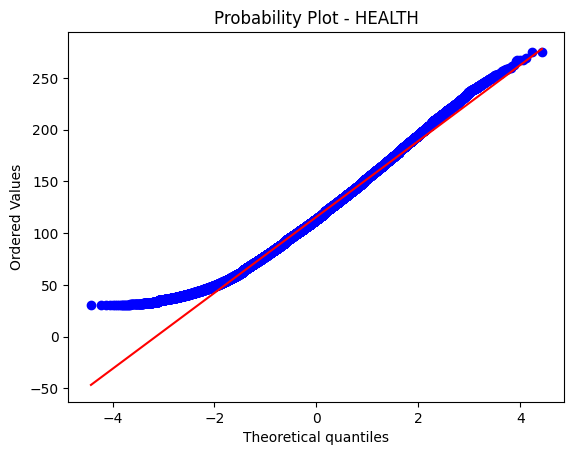

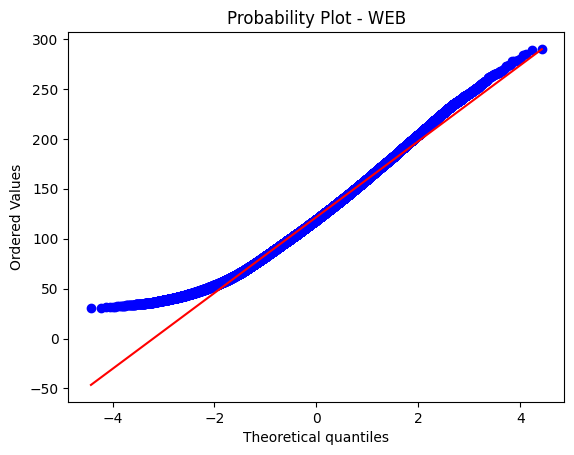

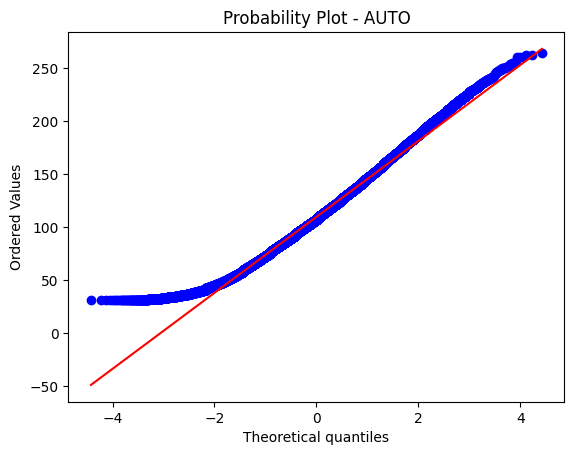

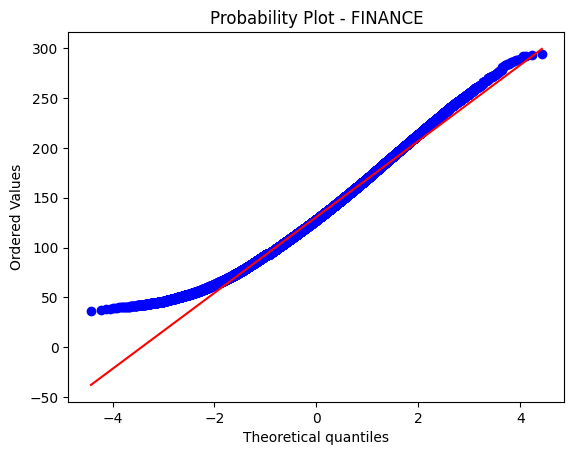

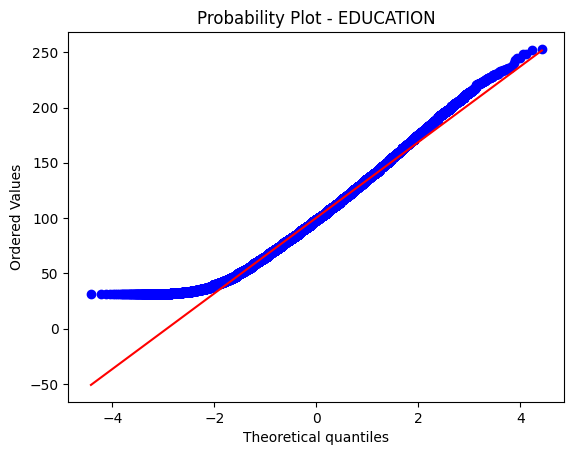

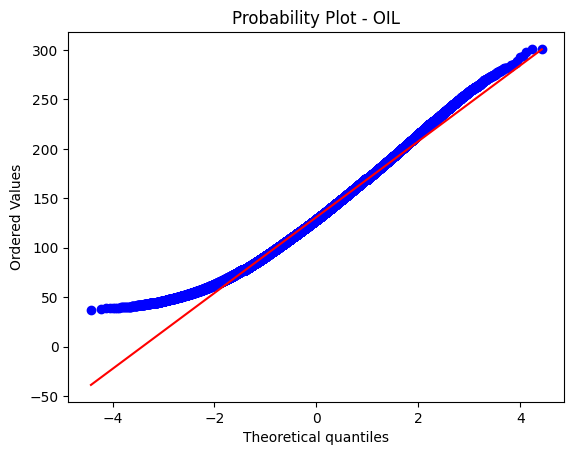

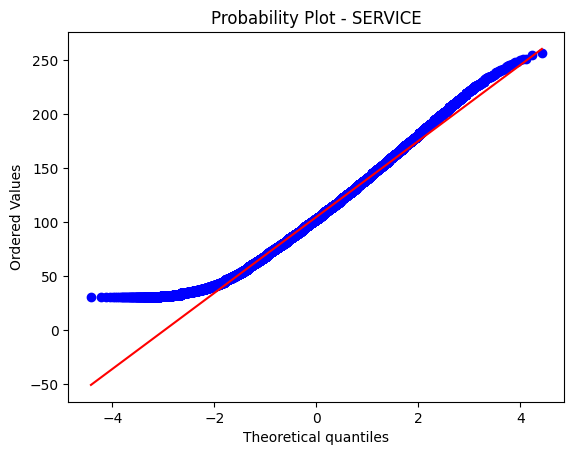

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.408242  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 15497.252287484

In [46]:
# perform anova test on industry and salary
perform_anova_test('industry','salary')

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234


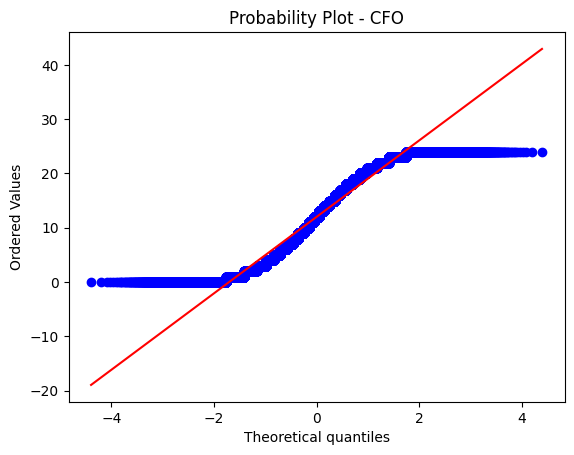

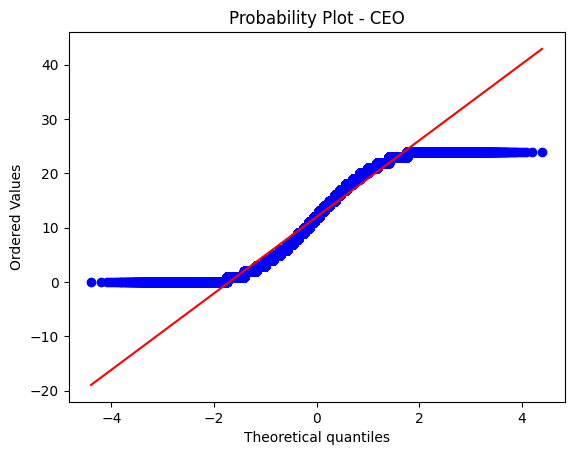

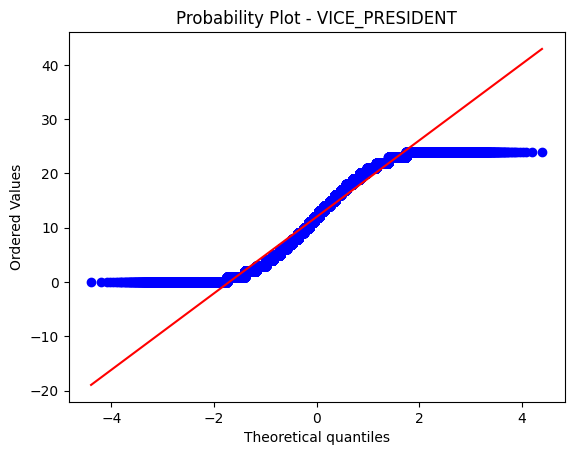

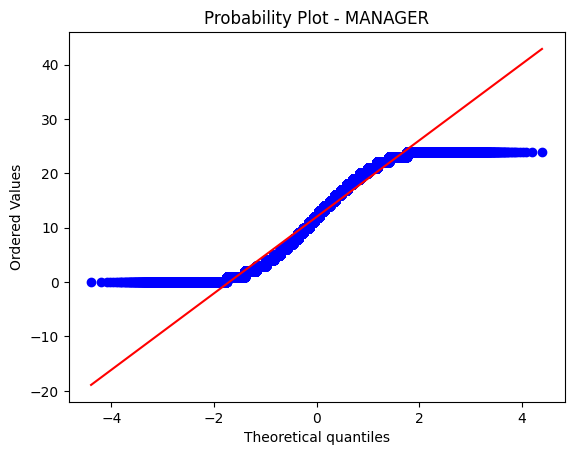

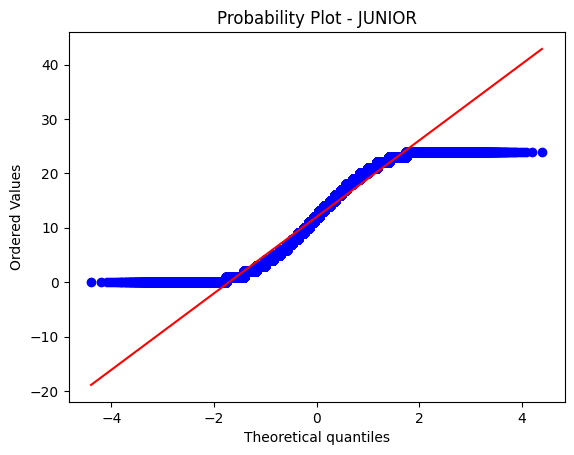

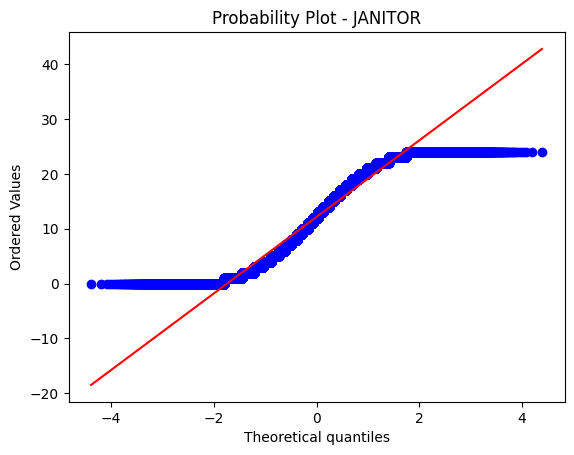

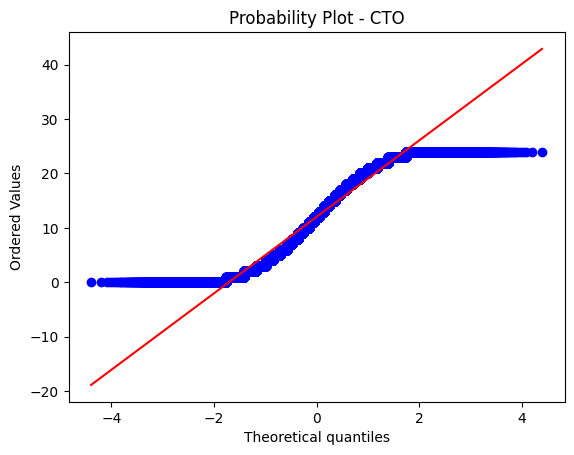

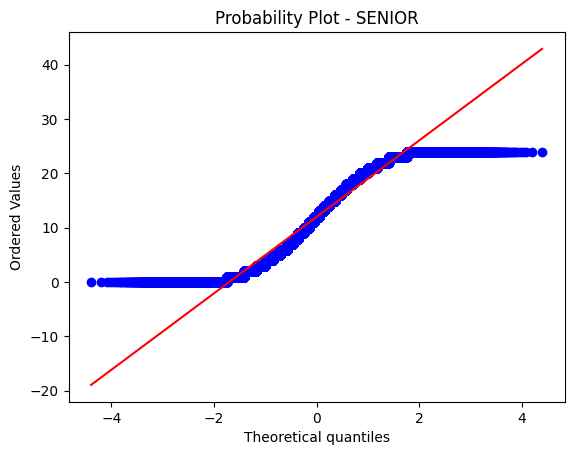

yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                      F crit  
Source of Variation           
Between Groups       2.28755  
Within Groups                 
Total                         
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and p value is: 9.905482767358365e-09
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 7.262147745370608  and critical value is: 2.2875503809763

In [47]:
# perform anova test on jobType and yearsExperience
perform_anova_test('jobType','yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410


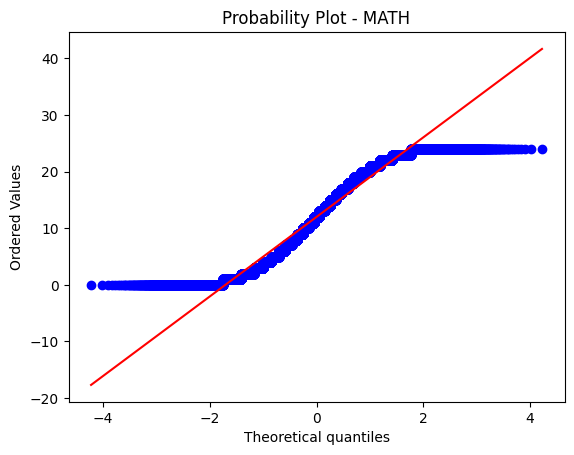

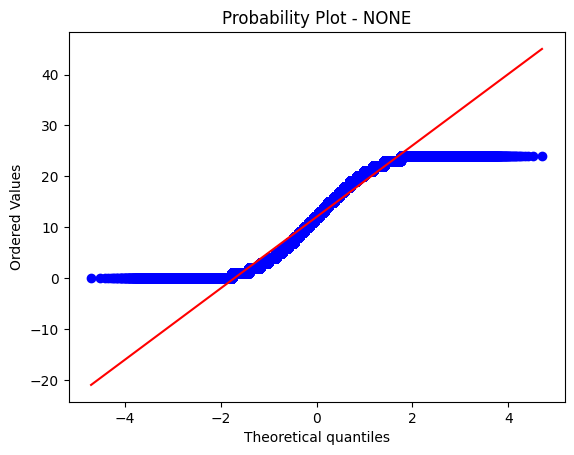

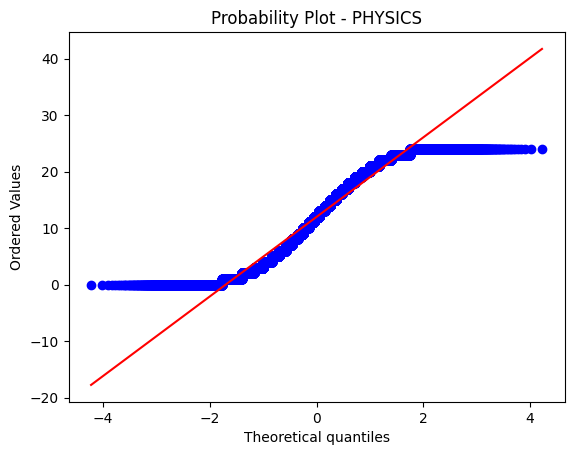

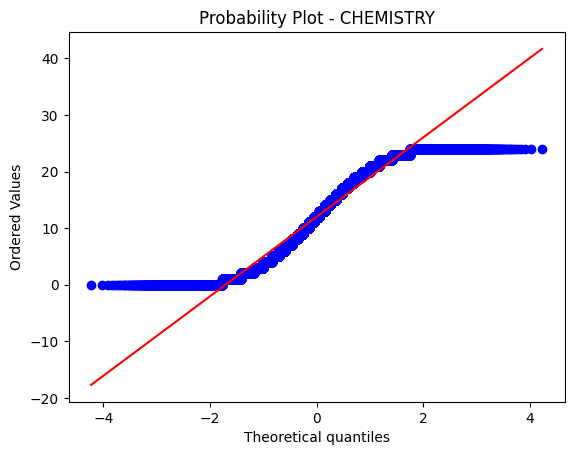

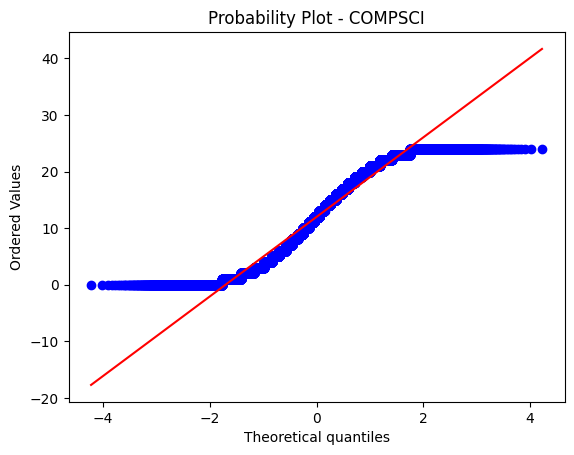

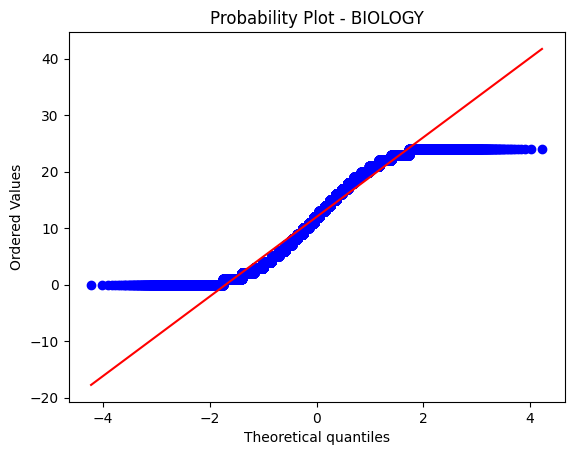

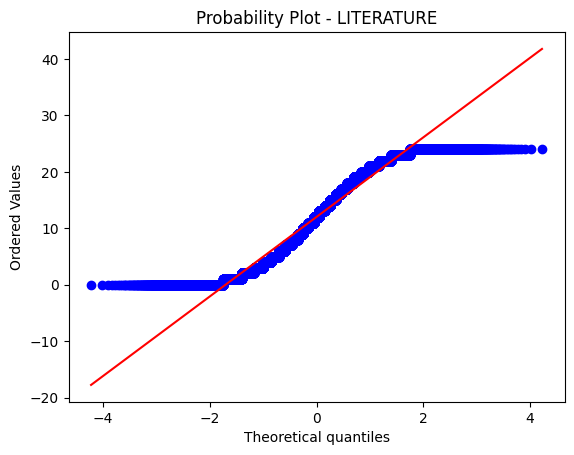

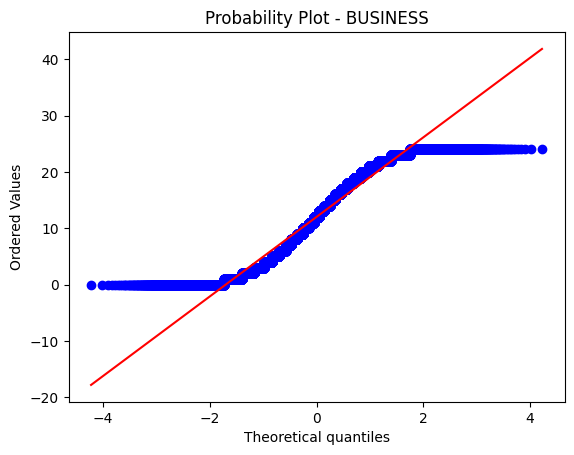

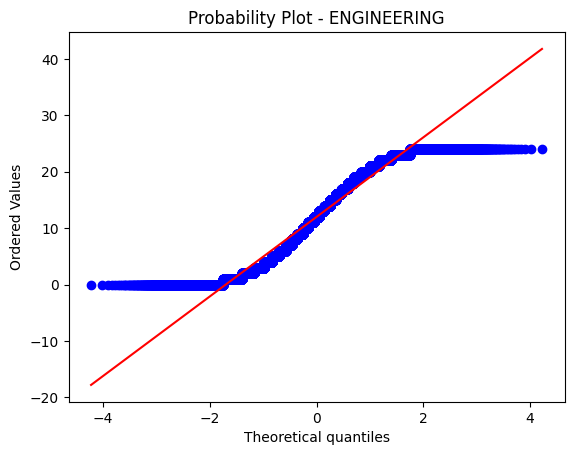

yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.191831  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and p value is: 0.2073404736822877
Failed to reject the null hypothesis.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 1.3626964191505286  and critical value is: 2.

In [48]:
# perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205


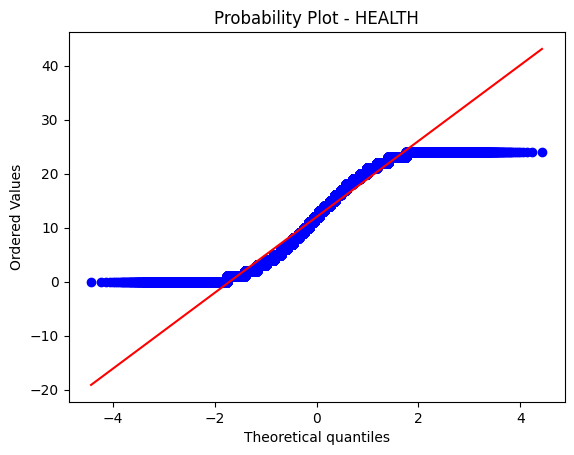

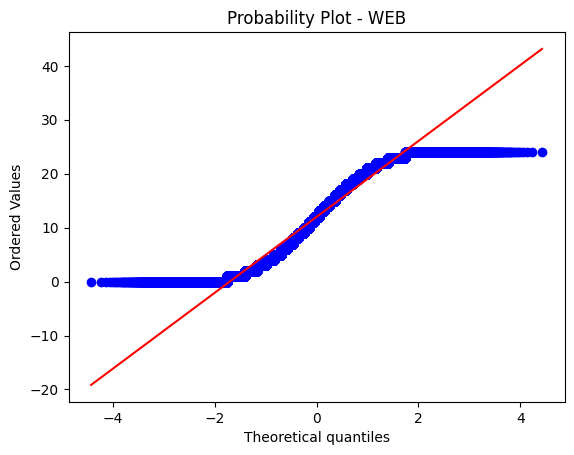

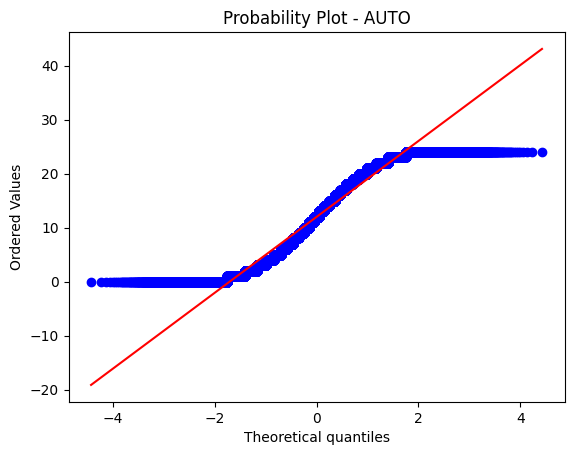

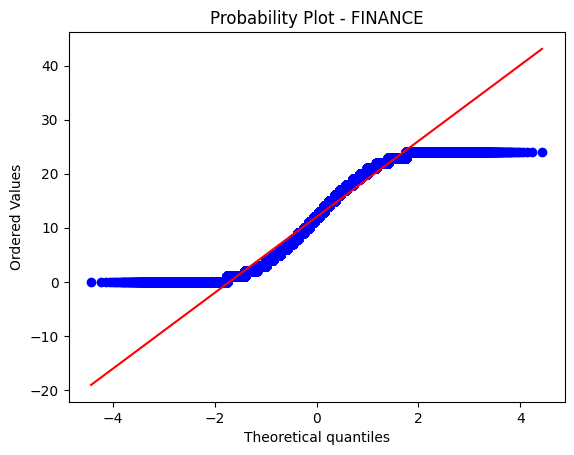

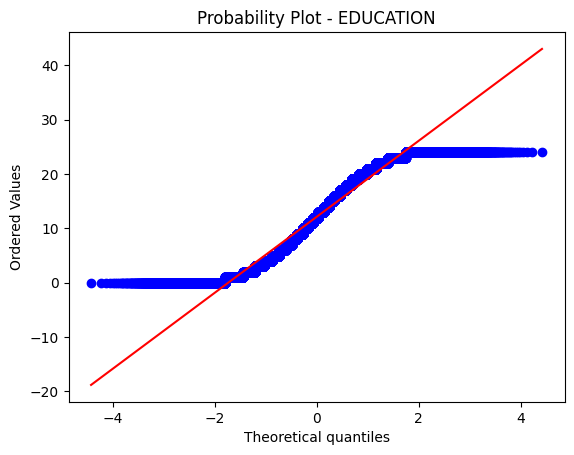

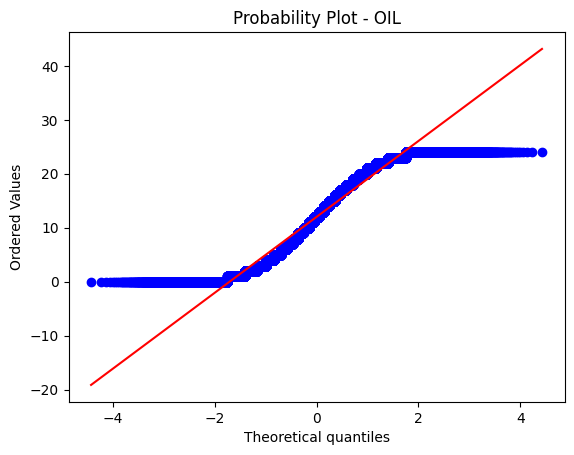

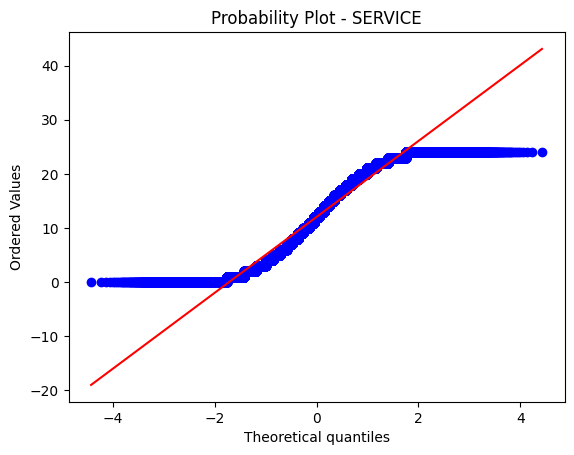

yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       2.408242  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypothesis is rejected.

-----------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and critical value is:

In [49]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')

**Dendrogram**


The dendrogram is a visual representation of the compound correlation data. The individual compounds are
arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by
joining individual compounds or existing compound clusters with the join point referred to as a node.

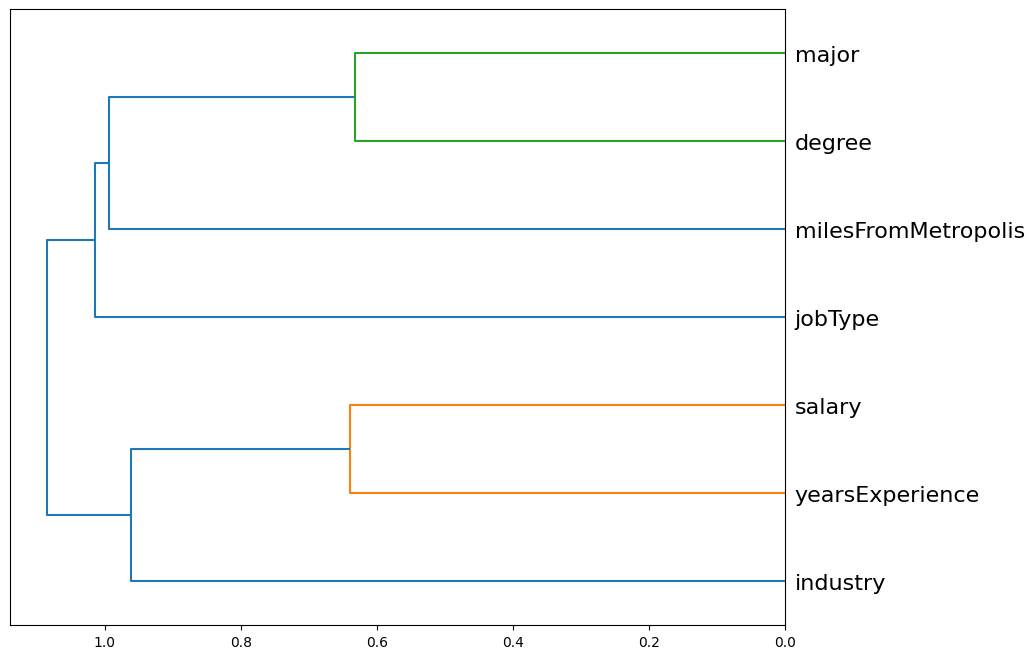

In [50]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(10,8))
dendrogram =hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram
Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

Since, there are no missing values and all the data are
distributed equally. We can start converting the categoricl values
to numerical.


**SCALING**

In [51]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler=  MinMaxScaler()
  df[col]=scaler.fit_transform(df[col])
  return df


In [52]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data =scale_data(train_data,col_train)

**MODELLING**

In [53]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    # helper function to fit and transform data
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    # helper function to get new column names after fitting and tranforming data
    def get_new_columns(self, X):
        new_columns = []

        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns


In [54]:
# Split the labels and the target
train_X =train_data.drop(['salary','milesFromMetropolis','yearsExperience'],axis=1)
train_Y =train_data['salary']


In [55]:
train_X.head()

jobType       degree      major industry
0             CFO      MASTERS       MATH   HEALTH
1             CEO  HIGH_SCHOOL       NONE      WEB
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE

In [56]:
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [57]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_X = encoder.fit_transform(train_X)
train_X =train_X.join(train_data['yearsExperience'])
train_X =train_X.join(train_data['milesFromMetropolis'])
train_X.head()


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         1.0         0.0             0.0            0.0   
1         1.0         0.0         0.0             0.0            0.0   
2         0.0         0.0         0.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            0.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             0.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    1.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    1.0              1.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           0.0                0.0   
2             1.0  ...           1.0           0.0                0.0   
3             1.0  ...           0.0           1.0                0.0   
4             0.0  ...           1.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          1.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          0.0              0.0          0.0   
4              1.0             0.0          0.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.416667             0.838384  
1         0.125000             0.737374  
2         0.416667             0.383838  
3         0.333333             0.171717  
4         0.333333             0.161616  

[5 rows x 31 columns]

In [58]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_X,train_Y,test_size=0.2)


In [59]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error


# Function for calculating RMSE
def rmse(x,y):
  return math.sqrt(((x-y)**2).mean())


# Function for calculating all the relevant metrics
def print_score(m):
  res =[rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
        m.score(X_train,Y_train),m.score(X_test,Y_test),
        median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
        metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
        ]
  print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: "+str(res[3])+
  "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train:" +str(res[6]) +"\nMeanAE-Test:" +str(res[7]),'\n')

In [60]:
# Visualize importance of all the features in the dataset for the prediction
def visualize_importance(feature_importances, feat_train_df):

 # creating dataframe for feature name and feature importance
 feature_importance_df =pd.DataFrame()
 _df =pd.DataFrame()
 _df['feature_importance'] =feature_importances
 _df['column'] =feat_train_df.columns
 feature_importance_df =pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)

 # grouping all data and sorting in descending order
 order = feature_importance_df.groupby('column')\
       .sum()[['feature_importance']]\
       .sort_values('feature_importance',ascending=False).index[:50]



 # ploting feature importance data using boxenplot
 fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
 sns.boxplot(data=feature_importance_df,
             x='feature_importance',
             y='column',
             order=order,
             ax=ax,
             palette='viridis',
             orient='h')
 ax.tick_params(axis='x',rotation=0)
 ax.set_title("Importance")
 ax.grid()
 fig.tight_layout()
 return fig, ax

NOTE:
The employee salaries dataset has 1000000 samples.
We have used only 50000 samples for training.
If  we use complete dataset.
Using complete dataset will take longer time to train the model.


**Linear Regression**


RMSE-Train: 19.633659974567415
RMSE-Test: 19.600153099745647
Score-Train: 0.7402911532314966
Score-Test: 0.7402708634261174
MedAE-Train: 13.765625
MedAE-Test: 13.765625
MeanAE-Train:15.872734355616524
MeanAE-Test:15.855893188311363 

CPU times: user 2.79 s, sys: 885 ms, total: 3.67 s
Wall time: 2.63 s


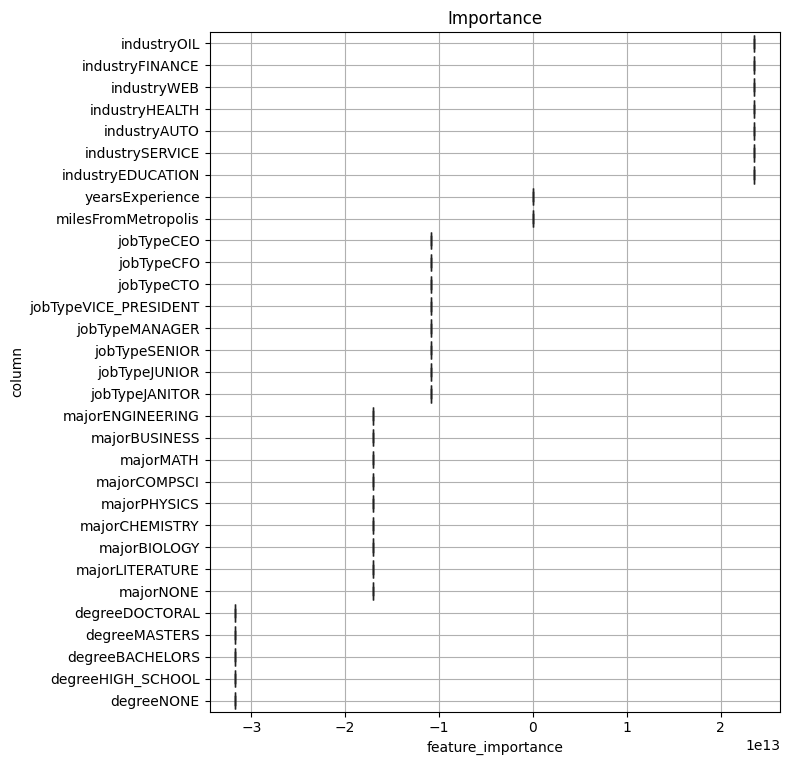

In [61]:
%%time
# Fit a Linear Regression model to the train dataset
# Import LinearRegressor
from sklearn.linear_model import LinearRegression
# Instantiate the model
lModel =LinearRegression()

# Fit the model to the data
lModel.fit(X_train,Y_train)

# print score of the model
print_score(lModel)
# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_,train_X)

**Random Forest Regressor**

RMSE-Train: 20.022167495251725
RMSE-Test: 20.593612151677444
Score-Train: 0.7299113132195335
Score-Test: 0.7132741804079948
MedAE-Train: 13.099999999999994
MedAE-Test: 14.0
MeanAE-Train:15.817102845504627
MeanAE-Test:16.485307652641747 

CPU times: user 2min 8s, sys: 350 ms, total: 2min 9s
Wall time: 2min 9s


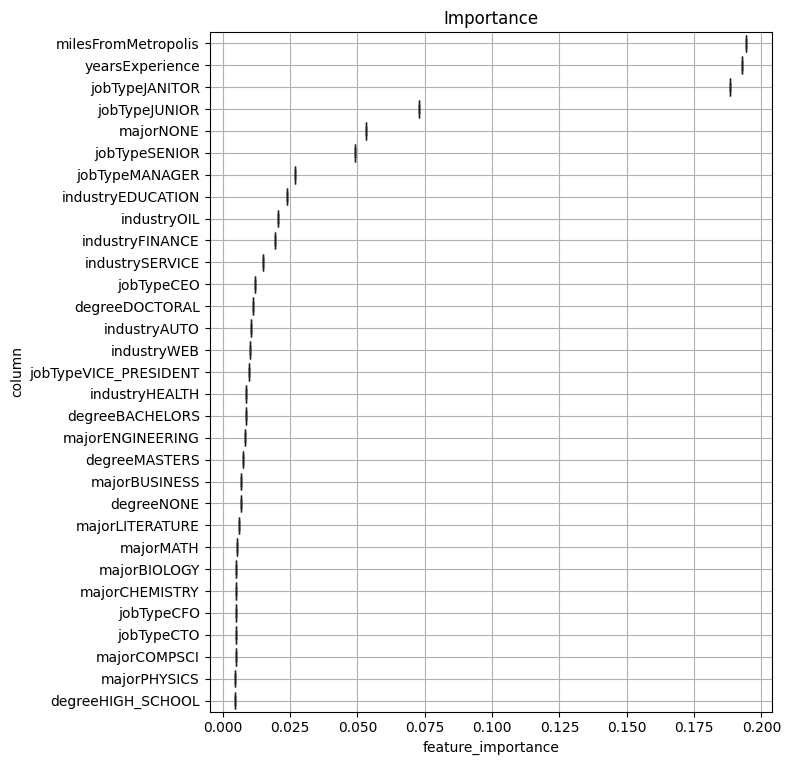

In [62]:
%%time
# Fit a Random Forest Regressor model to the train dataset
# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate the model
rf=RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])

# print score of the model
print_score(rf)
# visualizing the inportance of features.
fig, ax =visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])

**KNeighbors Regressor**

In [63]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset


# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor
# Instantiate the model
knnr =KNeighborsRegressor()
# print score of the model
knnr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
# print score of the model
print_score(knnr)


RMSE-Train: 23.97433552976892
RMSE-Test: 24.03440019142929
Score-Train: 0.6127625324500535
Score-Test: 0.6094574830645532
MedAE-Train: 15.199999999999989
MedAE-Test: 15.200000000000003
MeanAE-Train:18.657861405095996
MeanAE-Test:18.714978697809634 

CPU times: user 6min 3s, sys: 1.05 s, total: 6min 4s
Wall time: 3min 37s


**Gradient Boosting Regressor**

RMSE-Train: 19.438397121015562
RMSE-Test: 19.435199640175142
Score-Train: 0.745431236110295
Score-Test: 0.7446241903318327
MedAE-Train: 13.647021013095973
MedAE-Test: 13.646521378213528
MeanAE-Train:15.703417541897764
MeanAE-Test:15.705525556430523 

CPU times: user 12.9 s, sys: 312 ms, total: 13.2 s
Wall time: 13.1 s


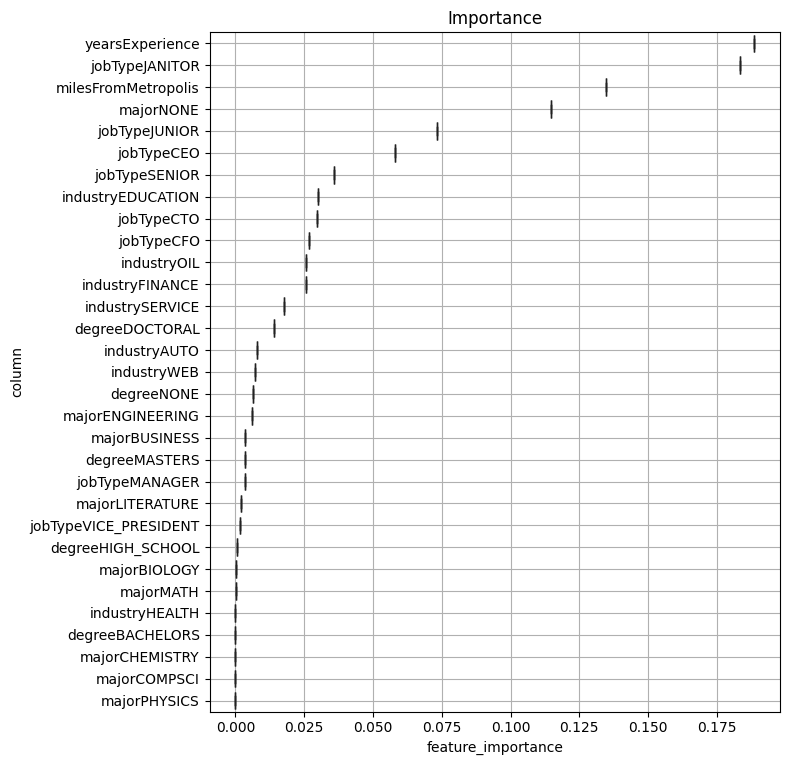

In [64]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model
GBR =GradientBoostingRegressor()
GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(GBR)
# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

**DecisionTree Regressor**

RMSE-Train: 26.910249950303072
RMSE-Test: 27.77442653007457
Score-Train: 0.5121125169602083
Score-Test: 0.4784548085233037
MedAE-Train: 16.0
MedAE-Test: 18.0
MeanAE-Train:20.314568145042383
MeanAE-Test:21.667634454413314 

CPU times: user 2.1 s, sys: 195 ms, total: 2.29 s
Wall time: 2.16 s


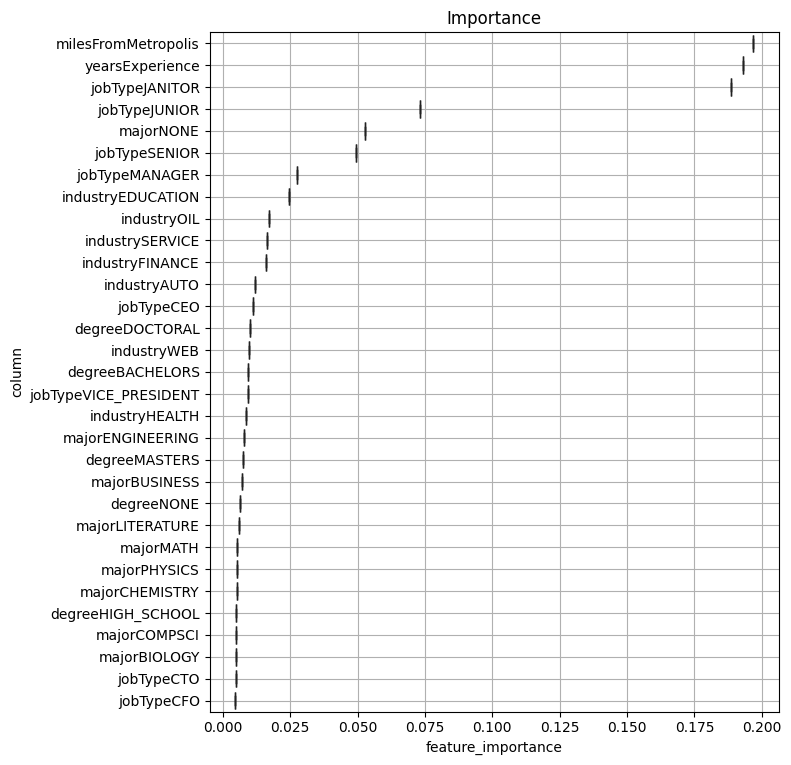

In [65]:
%%time
# Fit a Decision Tree Regressor model to the train dataset
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
DTR =DecisionTreeRegressor()
# Instantiate the model
DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(DTR)
# visualizing the inportance of features.
fig, ax = visualize_importance(DTR.feature_importances_,train_X.iloc[1:50000])

**AdaBoost Regressor**

RMSE-Train: 25.290939984281454
RMSE-Test: 25.26046748419968
Score-Train: 0.5690626318624159
Score-Test: 0.5685956583342037
MedAE-Train: 19.552013784191246
MedAE-Test: 19.483981433120476
MeanAE-Train:21.13563983084675
MeanAE-Test:21.08259183111387 

CPU times: user 21.6 s, sys: 5.31 s, total: 26.9 s
Wall time: 26.8 s


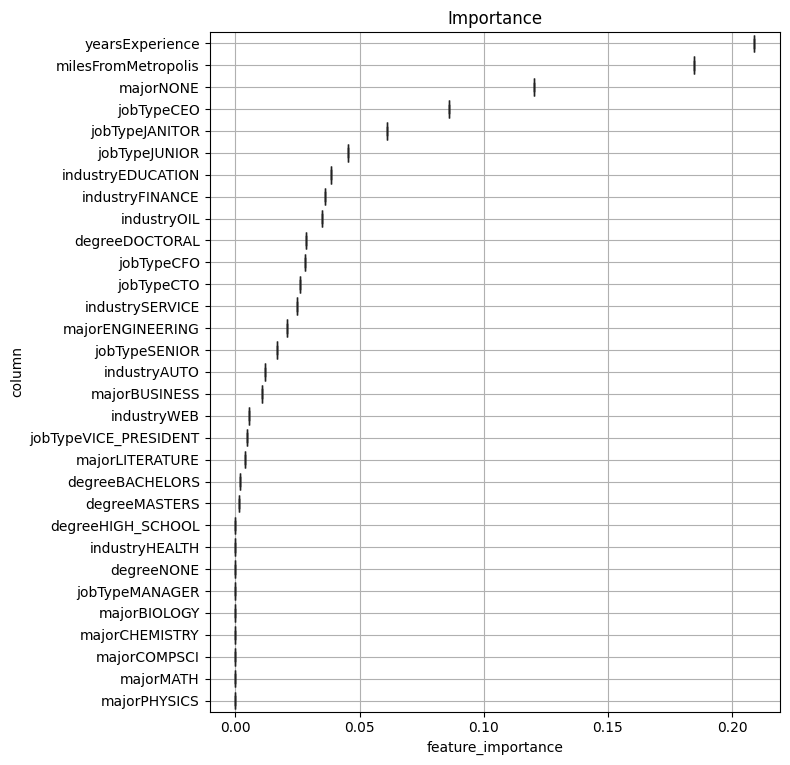

In [66]:
%%time
# Fit a AdaBoost Regressor model to the train dataset
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
AdaBoost = AdaBoostRegressor()
# Instantiate the model
AdaBoost.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(AdaBoost)
# visualizing the inportance of features.
fig, ax =visualize_importance(AdaBoost.feature_importances_,train_X.iloc[1:50000])

**XGBoost**

RMSE-Train: 19.340129094479366
RMSE-Test: 19.461261015375747
Score-Train: 0.7479986018829892
Score-Test: 0.7439388454748947
MedAE-Train: 13.454944610595703
MedAE-Test: 13.530532836914062
MeanAE-Train:15.600246816621475
MeanAE-Test:15.703483496266292 

CPU times: user 16 s, sys: 196 ms, total: 16.2 s
Wall time: 9.96 s


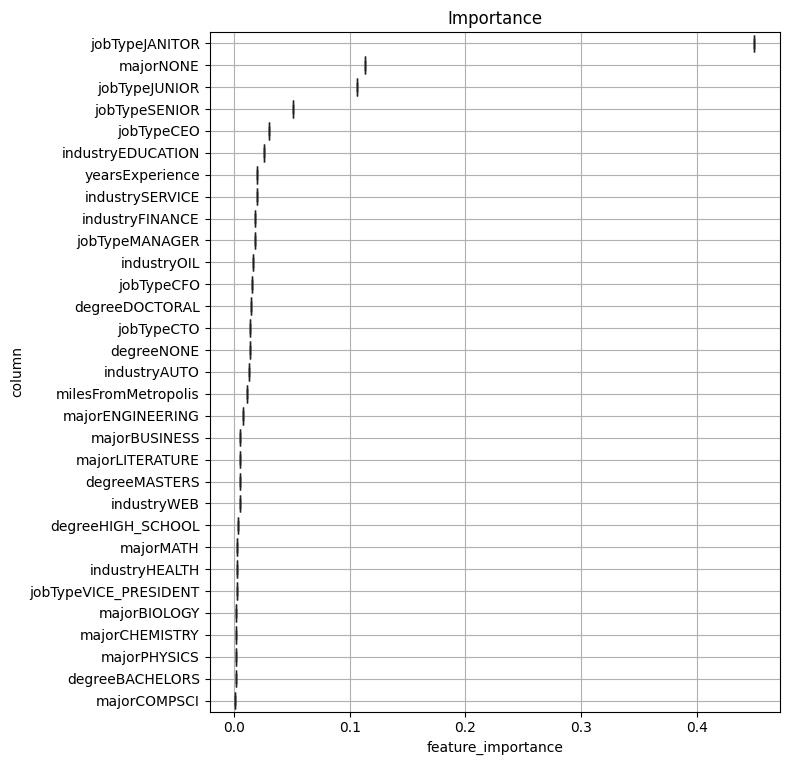

In [67]:
%%time
# Fit a XGB Regressor model to the train dataset
# Import XGBRegressor
from xgboost import XGBRegressor
# Instantiate the model
xgbr =XGBRegressor()
# Fit the model to the data
xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(xgbr)
# visualizing the inportance of features.
fig, ax =visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])

**Light Gradient Boosted Machine**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 49999, number of used features: 31
[LightGBM] [Info] Start training from score 116.516890
RMSE-Train: 19.040810682317822
RMSE-Test: 19.056556687020862
Score-Train: 0.7557384644663763
Score-Test: 0.7544778906720192
MedAE-Train: 13.441553809982402
MedAE-Test: 13.436376754833077
MeanAE-Train:15.44387474202205
MeanAE-Test:15.460414580008246 

CPU times: user 26.5 s, sys: 505 ms, total: 27 s
Wall time: 28.2 s


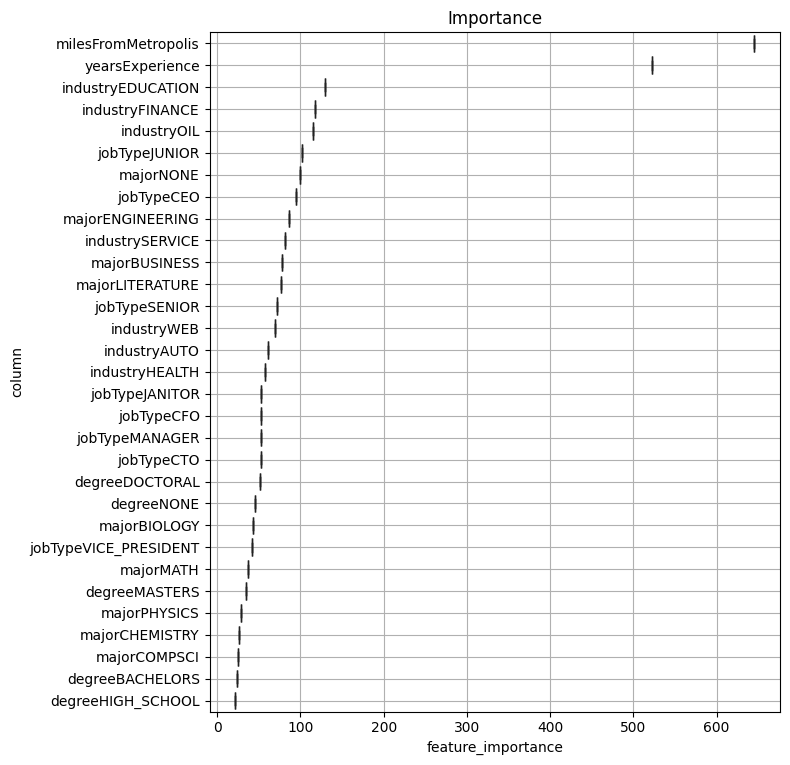

In [68]:

%%time
# Fit a lightgbm Regressor model to the train dataset
# Import lightgbm
import lightgbm as lgbm
# Instantiate the model
lg =lgbm.LGBMRegressor()
# Fit the model to the data
lg.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
# print score of the model
print_score(lg)
# visualizing the inportance of features.
fig, ax =visualize_importance(lg.feature_importances_,train_X.iloc[1:50000])

**Comparing all the model based on metric
**

In [69]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models, names, X_train, Y_train, X_test, Y_test):
    # now, create a list with the objects
    data = {'Metric': ['rmse', 'MedAE', 'MAE', 'R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x, y):
        return math.sqrt(((x - y)**2).mean())

    for (model, name) in zip(models, names):
        y_pred = model.predict(X_test)  # then predict on the test set
        res = [
            rmse(model.predict(X_train), Y_train),
            rmse(model.predict(X_test), Y_test),
            metrics.median_absolute_error(model.predict(X_train), Y_train),
            metrics.median_absolute_error(model.predict(X_test), Y_test),
            metrics.mean_absolute_error(model.predict(X_train), Y_train),
            metrics.mean_absolute_error(model.predict(X_test), Y_test),
            metrics.r2_score(model.predict(X_train), Y_train),
            metrics.r2_score(model.predict(X_test), Y_test),
        ]
        df_train[name] = [res[0], res[2], res[4], res[6]]
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train, df_test

In [70]:
# List of model objects
models = [lModel, DTR, rf, knnr, GBR, xgbr, AdaBoost, lg]

# List of model names
names = ['Lr', 'Dtree', 'Forest', 'Knn', 'GBR', 'Xboost', 'AdaBoost', 'LGBM']

# Compare models
comp_model_train, comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)


**RMSE of all model on train and test data**


In [71]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric        Lr     Dtree     Forest        Knn        GBR     Xboost  \
0   rmse  19.63366  26.91025  20.022167  23.974336  19.438397  19.340129   

   AdaBoost       LGBM  
0  25.29094  19.040811  


  Metric         Lr      Dtree     Forest      Knn      GBR     Xboost  \
0   rmse  19.600153  27.774427  20.593612  24.0344  19.4352  19.461261   

    AdaBoost       LGBM  
0  25.260467  19.056557  


All metrics on train and test data


In [72]:
# printing comparision of model on train and test
print("Result on test data")
comp_model_test

Result on test data


Metric         Lr      Dtree     Forest        Knn        GBR  \
0       rmse  19.600153  27.774427  20.593612  24.034400  19.435200   
1      MedAE  13.765625  18.000000  14.000000  15.200000  13.646521   
2        MAE  15.855893  21.667634  16.485308  18.714979  15.705526   
3  R-squared   0.648341   0.492765   0.634598   0.423850   0.612391   

      Xboost   AdaBoost       LGBM  
0  19.461261  25.260467  19.056557  
1  13.530533  19.483981  13.436377  
2  15.703483  21.082592  15.460415  
3   0.672830   0.133748   0.676620

# **Hyperparameter Tunning**

**RamdomizedSearchCV**

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)


In [73]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
 from sklearn.model_selection import RandomizedSearchCV
 # Random search of parameters, using 3 fold cross validation,
 # search across 100 different combinations, and use all available cores
 random =RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
 random.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
 print(random.best_params_)


In [74]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth':  np.arange(1, 33),
 'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
 'bootstrap': [True, False]}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False}


In [75]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
'max_depth': np.arange(1, 33),
'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid=GBR_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8, 'learning_rate': 0.25}


In [76]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
 "splitter":["best","random"],
 "max_depth" : np.arange(1, 33),
 "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
 "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
 "max_features":["auto","log2","sqrt",None],
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train,Y_train,param_grid=DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20}


In [77]:
from xgboost import XGBRegressor
# create parameters dict for tunning
XGB_para_grid = {
 "learning_rate" : [0.05, 0.10, 0.15] ,
"max_depth" : range(3,10,2),
"min_child_weight" : range(1,6,2),
"gamma" : [ 0.0, 0.1, 0.2 ],
"colsample_bytree" : [ 0.3, 0.4]
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search( XGBRegressor(),X_train,Y_train,param_grid=XGB_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


Using the best parameters and training the models


**Random Forest Regressor
**

RMSE-Train: 30.3148276182055
RMSE-Test: 30.24548419331325
Score-Train: 0.38085207896381124
Score-Test: 0.3815240345406232
MedAE-Train: 20.832221163012264
MedAE-Test: 20.82926829268301
MeanAE-Train:24.304751799829997
MeanAE-Test:24.229208640976776 

CPU times: user 9.99 s, sys: 215 ms, total: 10.2 s
Wall time: 10.1 s


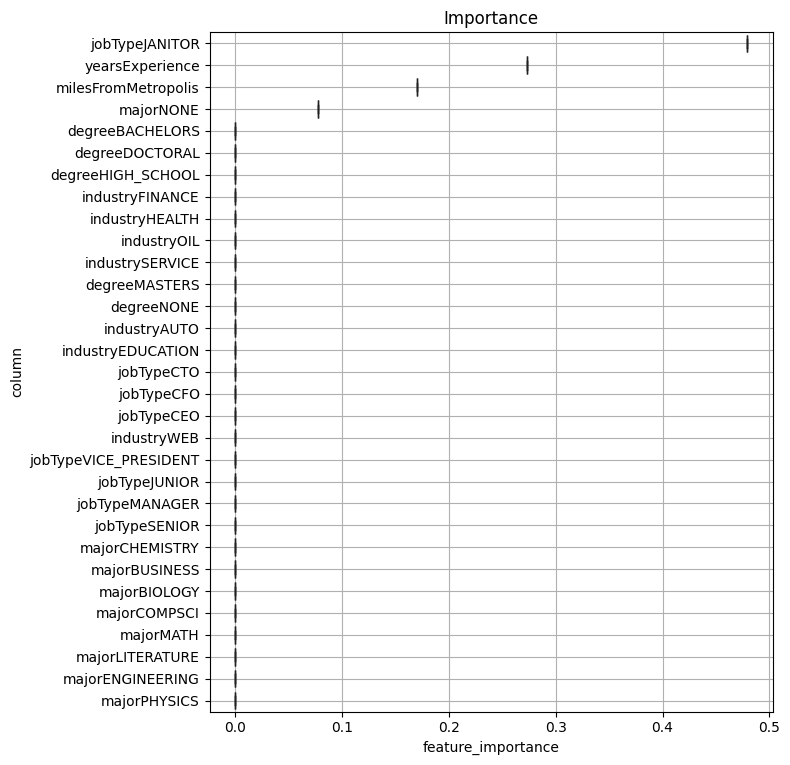

In [78]:
%%time
# Fit a Random Forest Regressor model to the train dataset
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators=64, min_samples_leaf=0.1, max_features='auto', max_depth=27, bootstrap=False)

# Fit the model to the data
rf.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model (assuming print_score function is defined)
print_score(rf)

# visualizing the importance of features (assuming visualize_importance function is defined)
fig, ax = visualize_importance(rf.feature_importances_, train_X.iloc[1:10000])


**Gradient Boosting Regressor**

RMSE-Train: 19.165600482536494
RMSE-Test: 19.162696720359957
Score-Train: 0.752526286879114
Score-Test: 0.7517352863051986
MedAE-Train: 13.467310843240796
MedAE-Test: 13.47757268713923
MeanAE-Train:15.531581279975864
MeanAE-Test:15.531202854786901 

CPU times: user 14.2 s, sys: 317 ms, total: 14.5 s
Wall time: 14.4 s


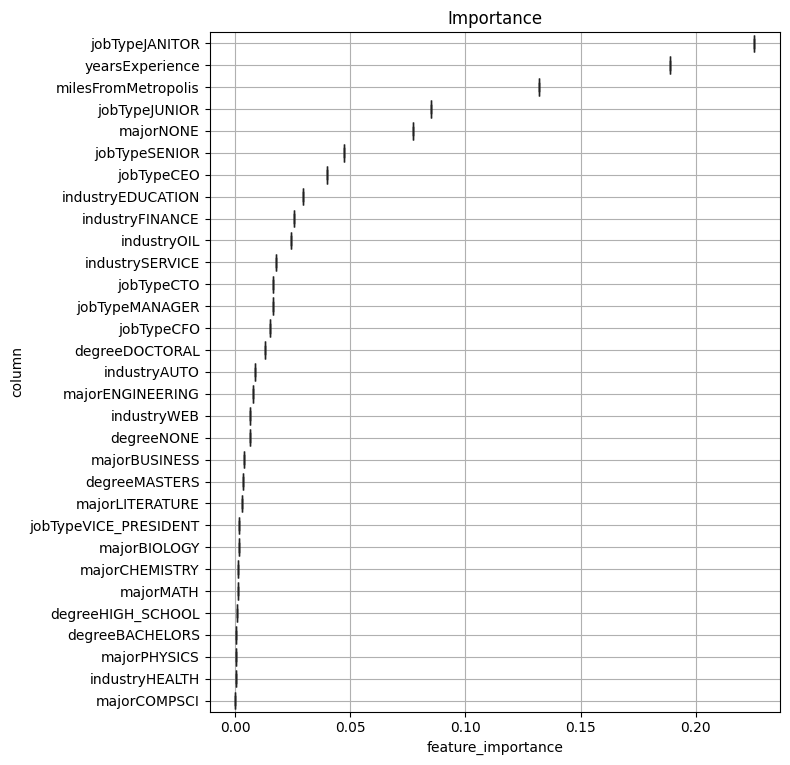

In [79]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor(n_estimators=64, min_samples_split=0.1, max_depth=8, learning_rate=0.25)

# Fit the model to the data (assuming X_train and Y_train are defined)
GBR.fit(X_train.iloc[1:50000], Y_train.iloc[1:50000])

# Print score of the model (assuming print_score function is defined)
print_score(GBR)

# Visualize the importance of features (assuming visualize_importance function is defined)
fig, ax = visualize_importance(GBR.feature_importances_, train_X.iloc[1:50000])


**Decision Tree Regrsessor**


RMSE-Train: 34.659513067184086
RMSE-Test: 34.64634104065375
Score-Train: 0.1906634999327066
Score-Test: 0.18844773076961874
MedAE-Train: 24.10681818181817
MedAE-Test: 24.10681818181817
MeanAE-Train:27.916345754950786
MeanAE-Test:27.903055591511077 

CPU times: user 805 ms, sys: 201 ms, total: 1.01 s
Wall time: 876 ms


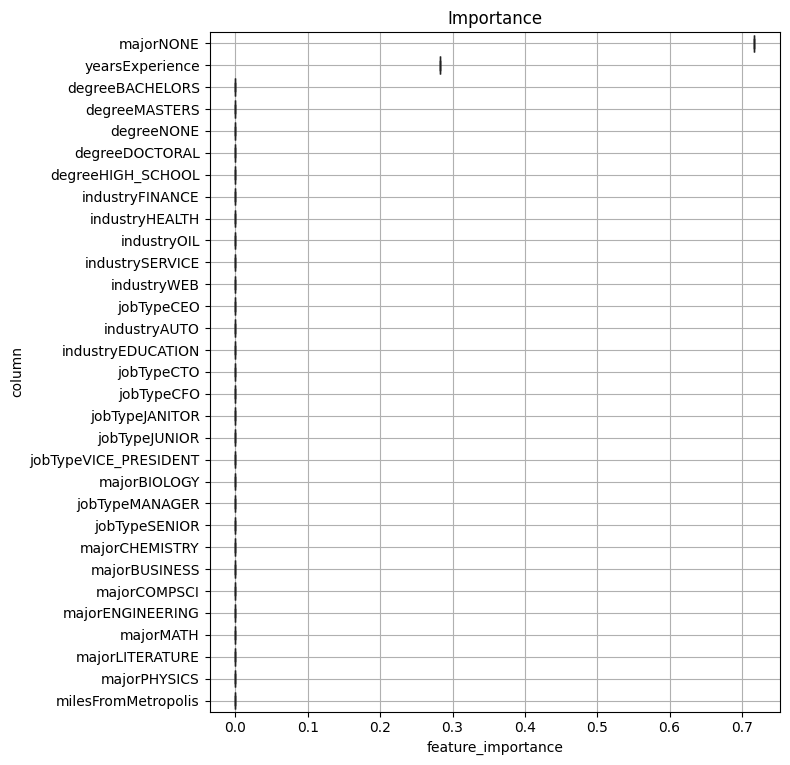

In [80]:
%%time
# Fit a Decision Tree Regressor model to the train dataset
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(splitter='random', min_weight_fraction_leaf=0.1, min_samples_leaf=0.2, max_features=None, max_depth=5)
DTR.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# print score of the model
print_score(DTR)

# Visualize the importance of features (assuming visualize_importance function is defined)
fig, ax = visualize_importance(DTR.feature_importances_, train_X.iloc[1:10000])



**XGBoost Regressor**

RMSE-Train: 19.284474014187158
RMSE-Test: 19.292069712680153
Score-Train: 0.7494468836273578
Score-Test: 0.748371754447346
MedAE-Train: 13.502803802490234
MedAE-Test: 13.532238006591797
MeanAE-Train:15.595278294725514
MeanAE-Test:15.60272652225132 



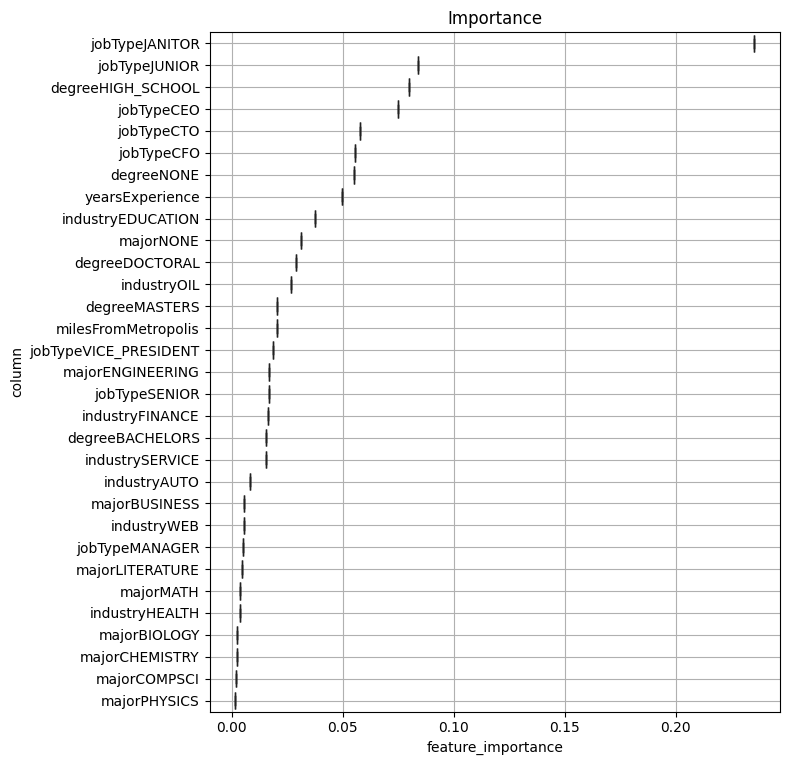

In [81]:
#Fit an XGBoost Regressor model to the train dataset
from xgboost import XGBRegressor

XGBR = XGBRegressor(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4})

XGBR.fit(X_train.iloc[1:10000], Y_train.iloc[1:10000])

# Print score of the model (assuming print_score function is defined)
print_score(XGBR)

# Visualize the importance of features (assuming visualize_importance function is defined)
fig, ax = visualize_importance(XGBR.feature_importances_, train_X.iloc[1:10000])

Comparing the metrics for tuned models

In [82]:
models= [DTR, rf,GBR, XGBR]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test =compare_models(models,names,X_train,Y_train,X_test,Y_test)


In [83]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.659513  30.314828  19.165600  19.284474
1      MedAE  24.106818  20.832221  13.467311  13.502804
2        MAE  27.916346  24.304752  15.531581  15.595278
3  R-squared  -3.131156  -0.592053   0.679407   0.667828

In [84]:
print("Metrics on test data")
comp_model_train

Metrics on test data


Metric      Dtree     Forest        GBR     Xboost
0       rmse  34.659513  30.314828  19.165600  19.284474
1      MedAE  24.106818  20.832221  13.467311  13.502804
2        MAE  27.916346  24.304752  15.531581  15.595278
3  R-squared  -3.131156  -0.592053   0.679407   0.667828

Now working with the test dataset provided


In [85]:
# test data
test_X = test_data
test_X

jobType       degree    major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1               JUNIOR         NONE     NONE     AUTO               20   
2                  CTO      MASTERS  BIOLOGY   HEALTH               17   
3              MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4               JUNIOR     DOCTORAL  BIOLOGY      OIL               10   
...                ...          ...      ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS     MATH      OIL               14   
999996         MANAGER         NONE     NONE   HEALTH               20   
999997         JANITOR         NONE     NONE      OIL                1   
999998             CTO     DOCTORAL     MATH      OIL               14   
999999          JUNIOR         NONE     NONE      OIL               16   

        milesFromMetropolis  
0                        73  
1                        47  
2                         9  
3                        96  
4                        44  
...                     ...  
999995                    3  
999996                   67  
999997                   91  
999998                   63  
999999                   31  

[1000000 rows x 6 columns]

In [86]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X =scale_data(test_X,col_test)


In [87]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop =test_X.drop(['jobType','degree','major','industry'],axis=1)
test_X =encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))
test_X =test_X.join(test_drop['yearsExperience'])
test_X =test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
0         0.0         0.0         0.0             0.0            0.0   
1         0.0         0.0         0.0             0.0            1.0   
2         0.0         0.0         1.0             0.0            0.0   
3         0.0         0.0         0.0             0.0            0.0   
4         0.0         0.0         0.0             0.0            1.0   

   jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
0             1.0            0.0                    0.0              0.0   
1             0.0            0.0                    0.0              0.0   
2             0.0            0.0                    0.0              0.0   
3             1.0            0.0                    0.0              0.0   
4             0.0            0.0                    0.0              0.0   

   degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
0             0.0  ...           0.0           0.0                0.0   
1             0.0  ...           0.0           1.0                0.0   
2             0.0  ...           0.0           0.0                0.0   
3             0.0  ...           0.0           0.0                0.0   
4             1.0  ...           0.0           0.0                0.0   

   industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  industryWEB  \
0              0.0             1.0          0.0              0.0          0.0   
1              0.0             0.0          0.0              0.0          0.0   
2              0.0             1.0          0.0              0.0          0.0   
3              0.0             0.0          1.0              0.0          0.0   
4              0.0             0.0          1.0              0.0          0.0   

   yearsExperience  milesFromMetropolis  
0         0.916667             0.737374  
1         0.833333             0.474747  
2         0.708333             0.090909  
3         0.583333             0.969697  
4         0.416667             0.444444  

[5 rows x 31 columns]

In [88]:
# Perforn the prediction on the test dataset
y_predicted =GBR.predict(test_X)
y_predicted


array([107.27033898,  91.28991111, 176.60964538, ...,  53.78973923,
       161.31875885, 114.51972131])

In [89]:
# creating a dataframe of predicted results
predictions =pd.DataFrame(y_predicted)

In [90]:
# predicted values in dataframe
predictions

0
0       107.270339
1        91.289911
2       176.609645
3        98.608506
4       113.696576
...            ...
999995  168.752082
999996   99.409427
999997   53.789739
999998  161.318759
999999  114.519721

[1000000 rows x 1 columns]

**Business Problem
**

In [91]:
### we take same samples provided my the manager so that we can explain him the difference
sample =train_data.sample(100)
sample

jobType       degree       major   industry  yearsExperience  \
912088             CFO     DOCTORAL     PHYSICS    SERVICE         0.541667   
910584          SENIOR  HIGH_SCHOOL        NONE        OIL         0.458333   
339109         MANAGER  HIGH_SCHOOL        NONE  EDUCATION         0.416667   
92038              CTO         NONE        NONE        OIL         0.583333   
198846             CTO  HIGH_SCHOOL        NONE    FINANCE         0.583333   
...                ...          ...         ...        ...              ...   
351182             CEO     DOCTORAL        NONE        OIL         0.541667   
687868         MANAGER    BACHELORS     COMPSCI    SERVICE         0.291667   
35997              CEO      MASTERS     PHYSICS     HEALTH         0.916667   
569709  VICE_PRESIDENT    BACHELORS     COMPSCI    FINANCE         0.291667   
842943             CTO     DOCTORAL  LITERATURE     HEALTH         0.583333   

        milesFromMetropolis  salary  
912088             0.373737     154  
910584             0.070707     122  
339109             0.393939      94  
92038              0.737374     117  
198846             0.868687     137  
...                     ...     ...  
351182             0.383838     170  
687868             0.929293      76  
35997              0.232323     212  
569709             0.717172     107  
842943             0.686869     142  

[100 rows x 7 columns]

In [92]:
train_cat = sample.iloc[:,0:4] #categorical variables for sample
#encodind the samples
encoder =OneHotEncoder()
train_X =encoder.fit_transform(train_cat)
#processing the sample data
train =train_X.join(sample.iloc[:,4:])
#taking those samples whose salary is very less i.e the reason for employee resigning
sample =train[train['salary']<60]
#Preparing the x and y values
x_sample =sample.drop('salary',axis=1)
y_sample =sample['salary']
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x =scale_data(x_sample,col_test)
sample_x


jobTypeCEO  jobTypeCFO  jobTypeCTO  jobTypeJANITOR  jobTypeJUNIOR  \
335525         0.0         0.0         0.0             0.0            0.0   
292026         0.0         0.0         0.0             1.0            0.0   
457482         0.0         0.0         0.0             1.0            0.0   
171540         0.0         0.0         0.0             1.0            0.0   

        jobTypeMANAGER  jobTypeSENIOR  jobTypeVICE_PRESIDENT  degreeBACHELORS  \
335525             0.0            1.0                    0.0              0.0   
292026             0.0            0.0                    0.0              0.0   
457482             0.0            0.0                    0.0              0.0   
171540             0.0            0.0                    0.0              0.0   

        degreeDOCTORAL  ...  majorPHYSICS  industryAUTO  industryEDUCATION  \
335525             0.0  ...           0.0           0.0                0.0   
292026             0.0  ...           0.0           1.0                0.0   
457482             0.0  ...           0.0           0.0                0.0   
171540             0.0  ...           0.0           0.0                0.0   

        industryFINANCE  industryHEALTH  industryOIL  industrySERVICE  \
335525              0.0             1.0          0.0              0.0   
292026              0.0             0.0          0.0              0.0   
457482              0.0             0.0          0.0              0.0   
171540              0.0             0.0          1.0              0.0   

        industryWEB  yearsExperience  milesFromMetropolis  
335525          0.0            1.000             1.000000  
292026          0.0            0.000             0.000000  
457482          1.0            0.500             0.000000  
171540          0.0            0.375             0.666667  

[4 rows x 31 columns]

In [96]:
#predicting the sample
predicted_out =GBR.predict(sample_x)
predicted_out

array([90.44717403, 52.64377058, 99.46128344, 76.42811627])

In [97]:
y_sample #Real values

335525    57
292026    31
457482    58
171540    58
Name: salary, dtype: int64

As we can see the difference in values.
Example: The last sample the real value is 58 but the model predicted it to be 76...This may be because the
other competitors are offering him more as compared to the current salary..so he is leaving the company.
Here, we can clearly see a difference between the real salary given to the employee and the predicted
salary which may be the probable reason for the employee to leave the company
Insights :
### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:
1.Major employee of your company are not happy with the salary they are being provided..even if they
have the required skills to do the job as compared to other competitors.
2.The employee living in the metro cities are satisfied with the salaries they are receiving...but
employee's living far from the city are not getting a satisfactory salary which is the most probable
reason for them leaving the company.

**solution **:
1. Either increase the salary of these employee's(if they have the required degree and major)



QUESTION :
Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which
the company can offer to that employee:
job_type = CTO
degree = Masters
major = Biology
industry = Health
experience = 17
miles from metropolis = 9
SOLUTION :
We will fit in these data points into the model and suppose the model provide us the answer as 180
In this case we will basically provide the Manager with a range of salaries i.e
We can offer him a salary range of 175-190 dollars


CONCLUSION :
According to this model, the predicted value we got, matches with the actual target values. Does the model is
performing well. Even though we use only 50000 samples, the model may perform much better when trained on
complete dataset. We have performed EDA, preprocessing, buid different models, visualized feature
importance, did hyper parameter tunning of each model and did prediction.
